<div style="text-align: center;">
    <h1><b> FROM PIXELS TO PATTERNS: </b><br>Exploring the Efficacy of Evolutionary Algorithms in Image Recovery</h1>
<div style="text-align: center;">
    <hr>
    <p style="font-size: 18px; font-weight: normal;">Martina del Gaudio<br>3174092<br></p>
</div>

# **Evolutionary Algorithms: an introduction**

Evolution, a fundamental concept in biology, refers to the process through which species of organisms undergo changes over successive generations, driven by natural selection, genetic drift, mutation, and gene flow. This process results in the adaptation of organisms to their environments, leading to the diversity of life we observe today. The principles of evolution, first systematically described by Charles Darwin in the 19th century, explain how complex life forms evolve from simpler ones through gradual modifications and the survival of the fittest.

In the realm of computer science and artificial intelligence, these biological principles have been abstracted and adapted into a powerful set of techniques known as evolutionary algorithms (EAs). Evolutionary algorithms are a subset of evolutionary computation, a branch of artificial intelligence that mimics the processes of natural evolution to solve complex optimization and search problems. These algorithms operate through mechanisms analogous to biological evolution, including selection, crossover (recombination), mutation, and inheritance.

An evolutionary algorithm typically begins with a randomly generated population of candidate solutions to a given problem. Each candidate, often represented as a string of binary digits (though other representations are also used), is evaluated using a fitness function that quantifies its quality or suitability as a solution. The most promising candidates are then selected to reproduce, combining and modifying their genetic information to form a new generation of solutions. This iterative process continues, with each generation ideally producing solutions that are better adapted to the problem at hand.

Techniques such as genetic algorithms, genetic programming, evolution strategies, and differential evolution are among the most widely used evolutionary algorithms. Genetic algorithms, for example, use crossover and mutation operations to explore the search space, whereas genetic programming evolves computer programs to perform specific tasks. Evolution strategies emphasize the adaptation of strategy parameters, and differential evolution focuses on the differences between solutions to guide the search process. These techniques have been successfully applied in various fields, including optimization, machine learning, robotics, and more, demonstrating their versatility and effectiveness in tackling complex, multi-dimensional problems.

# **Evolutionary Art**


Evolutionary art, also known as generative art, is a fascinating and innovative application of evolutionary algorithms that merges art with computational techniques. This form of art leverages the principles of evolution to create visual compositions, music, and other forms of creative expression. By utilizing evolutionary algorithms, artists and computer scientists can explore a vast space of possible artistic creations, iteratively evolving them to produce aesthetically pleasing and often unexpected results.

The process of creating evolutionary art typically involves defining a digital genome that encodes the parameters of the artwork. This genome can represent various attributes, such as colors, shapes, textures, and other artistic elements. A population of these genomes is generated, and each is evaluated based on its aesthetic qualities. The evaluation can be performed manually by human judges, automatically using predefined criteria, or through a combination of both.

The fitness function in evolutionary art is crucial, as it guides the selection process towards more appealing creations. Human evaluation allows for subjective judgments of beauty, creativity, and novelty, while automated evaluation can enforce certain artistic rules or preferences. The selected genomes undergo genetic operations such as crossover and mutation to produce new variations, which are then subject to further evaluation and selection. This iterative process continues, gradually evolving the population towards increasingly sophisticated and appealing artworks.

Evolutionary art is useful and compelling for several reasons. It allows for the exploration of new artistic styles and forms that might be difficult or impossible to conceive through traditional methods. The process can yield surprising and innovative results, pushing the boundaries of creativity. Additionally, evolutionary art can serve as a tool for studying aesthetics and the principles of design, providing insights into what makes art appealing.

Furthermore, evolutionary art has practical applications in various fields. It is used in graphic design, where it can generate unique logos, patterns, and visual effects. In music, evolutionary algorithms can compose original pieces or aid in sound design. In architecture and industrial design, these techniques can help create novel structures and products. The use of evolutionary algorithms in art demonstrates the power of combining human creativity with computational methods, resulting in a synergistic approach that enhances both artistic and technological endeavors.

However for this project I will focus on another promising aspect of evolutionary art: **image reconstruction**.
Evolutionary image reconstruction is useful and compelling for several reasons. It allows for the enhancement of images that may be noisy or incomplete, improving their quality and clarity. The process can yield high-quality results that might be difficult to achieve through traditional image processing techniques. Additionally, it can serve as a tool for studying the principles of image representation and enhancement, providing insights into effective methods for digital image processing.

This branch is not only a perfect representation of how evolutionary algorithms can succesfully extend to immense domains, but it can also change our way of performing denoising or pattern recovery, tasks now performed by machine learning models.

Overall, evolutionary image reconstruction exemplifies the interdisciplinary nature of evolutionary computation, showcasing how biological principles can inspire new forms of creativity and innovation in the digital age.

# **Outline of the project**

This project is divided into two main parts:

In the first section, we will conduct a thorough analysis and comparison of various encoding methods used in evolutionary algorithms for image processing. Specifically, we will investigate three different approaches to image representation:

*   Flattening Whole Images
*   Representing Images as Graphs
*   Dividing Images into Patches

For the first representation (flattening whole images), we will conduct a comprehensive comparative analysis of various techniques used in evolutionary algorithms to fine-tune the algorithm with optimal parameters. This includes:

*   Mutation Methods
*   Selection Methods
*   Crossover Techniques
*   Population Size


In the second part, we will explore the parallels between the Hopfield model and evolutionary algorithms in the context of image reconstruction. We will analyze how these two approaches handle pattern recovery and compare their methodologies, strengths, and limitations.

By the end of this project, we aim to provide a comprehensive understanding of the effectiveness of different evolutionary algorithm techniques for image processing and highlight the similarities and differences with existent machine learning models.


# **A simple approach: flattening images**

There are diverse ways to encode the genome of a population, each with unique advantages and challenges. Encoding is a crucial part of devising evolutionary algorithms, as it directly affects the algorithm's performance and efficiency.

I will start with the first approach outlined in the introduction, **flattening**, which is the most straightforward and easiest to implement. It involves converting the entire image into a one-dimensional array where each pixel's intensity is a genome unit. This method preserves all the image information but can be computationally expensive for high-resolution images.

To get started, we need to import the necessary libraries. Let's begin by setting up our environment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import csv
import os
import numpy as np
import random
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from matplotlib import animation

For the rest of this project, I will primarily use one image as a benchmark to evaluate the effectiveness of various algorithms. The chosen painting is "Viandante sul mare di nebbia," a personal favorite due to its aesthetic appeal. This image is also suitable for recovery tests because it has a limited color palette and distinct lines separating different elements.

Additionally, I will work exclusively with gray-scale images. Gray-scale images occupy less memory, making them easier and faster to manage. Unlike RGB images, which have three color channels, gray-scale images have only one. This means gray-scale images can be represented as two-dimensional matrices, while RGB images require three-dimensional tensors. This simplification facilitates our analysis, though the approach could easily be extended to RGB images if needed.

Let's take a look at the image we will be working with.

(-0.5, 639.5, 639.5, -0.5)

Text(0.5, 1.0, 'Original Image')

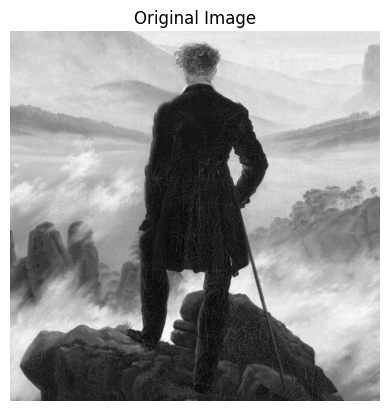

In [ ]:
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to grayscale

# Convert the resized image to a NumPy array
target_image = np.array(target_image)

# Visualize the resized image
plt.imshow(target_image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()


## **1. The Algorithm**





The next step is to define the class representing individuals in our population. Each individual will have a genome, which in our case is a flattened representation of the image, and a fitness function that evaluates the similarity between the individual's genome and the target image.

For example, if our initial image has dimensions of 20x20 pixels, the genome will be 400 units long. Each entry in the genome corresponds to the intensity of a pixel in the image. The 8th pixel of the second row, for instance, becomes the 28th element of the genome, and so forth.

To keep computational demands manageable, I will use a low-resolution image (20x20 pixels) for most of the analysis. Higher resolution images can have genomes with thousands of units, significantly increasing computation time and complexity. Working with lower resolution images allows for quicker experimentation and iteration.

Here's the lower-resolution image we will be using for this section.

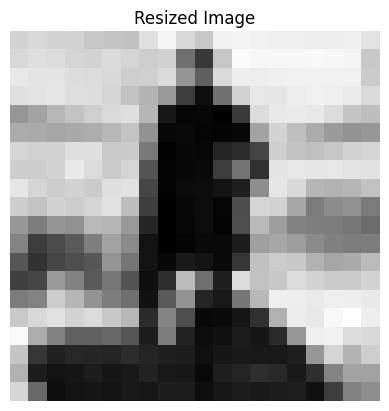

In [ ]:
# Load the target image and resize it to the desired shape
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((20, 20))
target_image = np.array(target_image)
# Visualize the resized image
plt.imshow(target_image, cmap='gray')
plt.axis('off')
plt.title('Resized Image')
plt.show()


Let's start by defining our Individual class. This class will be characterized by a genome representing the flattened image and a fitness function.

In [ ]:
class Individual:
    def __init__(self, genome):
        self.genome = genome
        self.fitness = None

Now, we will define the various functions needed to perform our evolutionary cycle. We will compare 3 kinds of comparisons to determine the most effective approach for evolving images correctly.

Specifically, the sections will be organized as follows:
*   **Comparison of selection and mutation methods**
*   **Comparison of crossover methods**
*   **Comparison of population sizes**

This fine-tuning of hyperparameters will be conducted primarily on low-resolution images due to their faster convergence properties. However, the initial comparison between different selection methods will also be performed on higher resolution images to verify consistency across different image dimensions. If we observe coherence in the results, we can confidently generalize our analysis to other types of images.

## **1.1 Comparing Selection and Mutation**

I will start by comparig two different selection procedures: **tournament selection** and **roulette wheel selection**. For each method, we will test various parameter ranges and select those that provide the fastest convergence and highest fitness.

Below there are the functions needed for our evolutionary cycle.

### **1.1.1 Tournament Selection**


Some of the following functions will remain the same also for the roulette wheel selection.

*   **initialize_population**: it initializes a population of individuals, each represented by a flattened representation of an image made by random noise. This ensures that there is no bias towards any specific target image.
*   **tournament_selection**: it samples a fixed number of individuals from the population, and returns the one with highest fitness.
*   **single_point_crossover**: it takes 2 parents and a random point. It then performs a single point crossover at that point, creating two offsprings.
*   **mutate**: it mutates any individual with a certain probability. A mutation corresponds to a changing in one of the pixels. The value of the new randomly chosen pixels is bounded in the range (0,226), which is the possible range of intensities for gray scale images.
*   **calculate_fitness**: the fitness is calculated with the pixel-wise difference of the individual with the target image. This difference is the error $\epsilon$. The fitness is then calculated as $$\frac{1}{1+\epsilon}$$
This means that our objective is to maximize the fitness function

In [ ]:
def initialize_population(pop_size, genome_length, value_range):
    return [Individual([random.randint(0, value_range - 1) for _ in range(genome_length)]) for _ in range(pop_size)]


def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament_with_fitness = [(ind, calculate_fitness(ind, target_image)) for ind in tournament]
    best_individual = max(tournament_with_fitness, key=lambda x: x[1])
    return best_individual[0]


def initialize_population_with_noise(pop_size, genome_length, value_range, original_image, noise_level):
    noisy_images = [original_image + np.random.normal(scale=noise_level, size=2500) for _ in range(pop_size)]
    return [Individual(noisy_image.flatten()) for noisy_image in noisy_images]


def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1.genome) - 1)
    offspring1 = parent1.genome[:point] + parent2.genome[point:]
    offspring2 = parent2.genome[:point] + parent1.genome[point:]
    return Individual(offspring1), Individual(offspring2)

def mutate(individual, mutation_rate, value_range):
    if random.random() < mutation_rate:
        mutation_point = random.randint(0, len(individual.genome) - 1)
        individual.genome[mutation_point] = random.randint(0, value_range - 1)

def calculate_fitness(individual, target):
    error = np.sum(np.abs(np.array(individual.genome) - np.array(target)))/len(target)
    return 1 / (1 + error)



We are now ready to define the evolutionary cycle. In each iteration, we perform tournament selection to create a list of parents. These parents undergo crossover to generate a new population of offspring. Each offspring is then mutated with a certain probability.

The starting population is sorted based on fitness values. The top two elites from the old population are retained, while the rest are replaced with the new offspring. This ensures that the best-performing individuals are preserved in each generation.

Here's the code for the evolutionary cycle:

In [ ]:
def evolutionary_cycle(population, target, tournament_size, mutation_rate):
    for ind in population:
        ind.fitness = calculate_fitness(ind, target)
    selected = [tournament_selection(population, tournament_size) for _ in population]
    offspring = []
    for i in range(0, len(population), 2):
        off1, off2 = single_point_crossover(selected[i], selected[i + 1])
        offspring.extend([off1, off2])
    # Mutation
    for ind in offspring:
        mutate(ind, mutation_rate, 256)
        ind.fitness = calculate_fitness(ind, target)
    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]  # top 2 elites
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population)-2])
    return new_population

def run_evolution(pop_size, genome_length, value_range, target, max_generations, fitness_threshold, tournament_size, mutation_rate, output_folder):
    population = initialize_population(pop_size, genome_length, value_range)

    #Note that this path has to be changed based on how you want your files to be named
    csv_file_path = os.path.join(output_folder, f"tournament_{tournament_size}_mutation_{mutation_rate}_new_50x50.csv")


    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Generation', 'Best Fitness'])

        for generation in range(max_generations):
            population = evolutionary_cycle(population, target, tournament_size, mutation_rate)
            best_fitness = max(ind.fitness for ind in population)
            writer.writerow([generation, best_fitness])
            #if generation%100 ==0:
            #  print(f"Generation {generation}: Best Fitness {best_fitness}")
            if best_fitness >= fitness_threshold:
                break
    return population


We are now ready to run our evolutionary algorithm. I will conduct a preliminary run for 1000 generations to gain general insights into how fitness evolves as a function of mutation rate and tournament size. Based on these results, I will fine-tune the parameters and conduct a more extended run to optimize performance.

In [ ]:
target_image_path = '/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png'
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
os.makedirs(output_folder, exist_ok=True)

target_image = Image.open(target_image_path).convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((20, 20))

target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

genome_size = len(target_image)

tournament_range = [3,6,10,12,15]
mutation_range = np.linspace(0, 0.5, 5)

for tournament in tournament_range:
    for mutation in mutation_range:
        print(tournament, mutation)
        run_evolution(100, genome_size, 256, target_image, 1000, 0.7, tournament, mutation, output_folder)

We can now analyze the impact of different tournament sizes and mutation rates on fitness convergence. I will define auxiliary functions to plot the results, allowing us to visually compare the performance of various parameter settings.

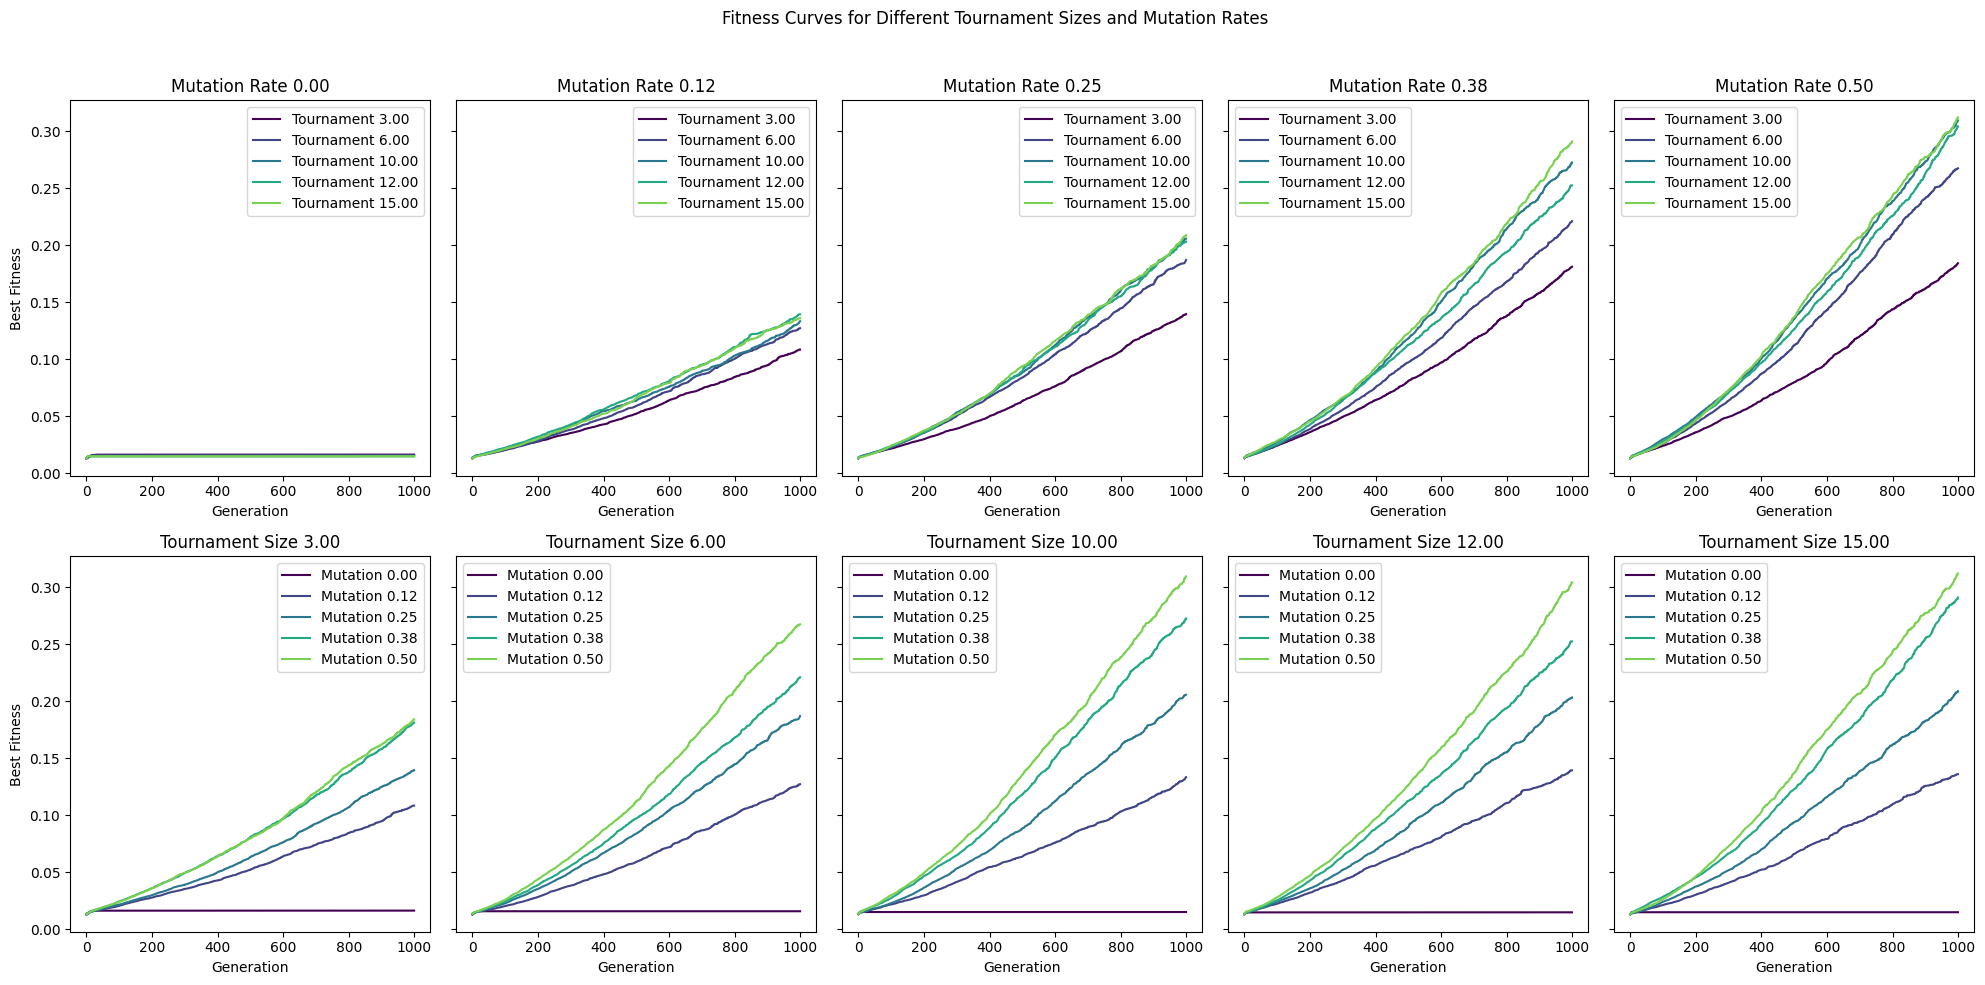

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
tournament_range = [3,6,10,12,15]
mutation_range = np.linspace(0, 0.5, 5)

# Function to load CSV data
def load_csv_data(output_folder, tournament_range, mutation_range):
    data = {}
    for tournament in tournament_range:
        for mutation in mutation_range:
            file_path = os.path.join(output_folder, f"tournament_{tournament}_mutation_{mutation}_new.csv")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                data[(tournament, mutation)] = df
    return data

# Load data
data = load_csv_data(output_folder, tournament_range, mutation_range)

# Create plots
fig, axes = plt.subplots(2, len(mutation_range), figsize=(20, 10), sharey=True)

# Plot all fitness curves for every tournament value fixing a mutation rate
for j, mutation in enumerate(mutation_range):
    ax = axes[0, j]
    for i, tournament in enumerate(tournament_range):
        if (tournament, mutation) in data:
            df = data[(tournament, mutation)]
            ax.plot(df['Generation'], df['Best Fitness'], label=f'Tournament {tournament:.2f}', color=plt.cm.viridis(i / len(tournament_range)))
    ax.set_title(f'Mutation Rate {mutation:.2f}')
    ax.set_xlabel('Generation')
    if j == 0:
        ax.set_ylabel('Best Fitness')
    ax.legend()
    ax.grid(False)

# Plot all fitness curves for every mutation value fixing a tournament size
for i, tournament in enumerate(tournament_range):
    ax = axes[1, i]
    for j, mutation in enumerate(mutation_range):
        if (tournament, mutation) in data:
            df = data[(tournament, mutation)]
            ax.plot(df['Generation'], df['Best Fitness'], label=f'Mutation {mutation:.2f}', color=plt.cm.viridis(j / len(mutation_range)))
    ax.set_title(f'Tournament Size {tournament:.2f}')
    ax.set_xlabel('Generation')
    if i == 0:
        ax.set_ylabel('Best Fitness')
    ax.legend()
    ax.grid(False)

plt.suptitle('Fitness Curves for Different Tournament Sizes and Mutation Rates')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The plots generated provide insightful observations into how different tournament sizes and mutation rates impact the convergence of the evolutionary algorithm. Here is a detailed analysis of the results along with possible explanations:

**Tournament size**

Increasing the tournament size leads to faster convergence. A larger tournament size means a higher selection pressure, as only the fittest individuals from a larger pool are selected for reproduction. This accelerates the convergence by promoting the best-performing individuals more aggressively. However, this also reduces genetic diversity, which might lead to premature convergence to local optima. The effect of tournament size is significant, but it shows less variation compared to mutation rates, indicating its secondary role in maintaining diversity within the population.

**Mutation rate**

The mutation rate has an even more pronounced effect on convergence than tournament size. Indeed, the lines representing the different values of muattion rates are more distanciated than the ones representing the tournament sizes, indicating a deeper impact on the fitness convergenc ìe as a whole. With a mutation rate of 0, the fitness remains unchanged, while increasing the mutation rate results in higher convergence rates. Indeed, mutation introduces new genetic material into the population, which helps in exploring the search space more effectively. Without mutation the population lacks the necessary genetic diversity to evolve towards the target image, hence the fitness remains constant. Increasing the mutation rate helps escape local optima and explores new potential solutions, leading to better convergence.



To conclude, the experiment confirms that both tournament size and mutation rate are crucial parameters influencing the performance of evolutionary algorithms. Larger tournament sizes accelerate convergence by favoring the best individuals, whereas higher mutation rates ensure sufficient diversity to explore the search space effectively. The observed trends are consistent with theoretical expectations and highlight the delicate balance required between exploration and exploitation in evolutionary algorithms.

I  decided to keep a mutation rate of **0.5** and a tournament size of **12**. Even if higher tournaments seems to bring slightly better results, the difference is minimal and increasing tournament can bring to local maxima that we want to avoid.

### **1.1.2 Roulette-wheel Selection**

I will now perform the same analysis using roulette-wheel selection. Of course there is no such parameter to train as the tournament size, so we will be able to only look at the mutation rate.

Firstly, I will give a brief explanation of it and a comparison with the tournament selection method


**Roulette Wheel Selection**

Roulette wheel selection, also known as fitness proportionate selection, assigns a selection probability to each individual based on its fitness. Individuals with higher fitness have a larger "slice" of the roulette wheel, and thus a higher chance of being selected. The process involves spinning the roulette wheel multiple times to select the required number of parents. This method inherently maintains diversity within the population by giving all individuals, even those with lower fitness, a chance to be selected. However, it can be computationally expensive and may struggle with premature convergence if there is a high variance in fitness values.

**Comparison**
- *Selection Pressure:* Tournament selection provides more control over selection pressure through tournament size, whereas roulette wheel selection’s pressure is determined by the relative fitness of individuals.
- *Computational Efficiency:* Tournament selection is generally more efficient as it involves fewer fitness evaluations compared to the cumulative probability calculations in roulette wheel selection.
- *Diversity Maintenance:* Roulette wheel selection maintains diversity better because even less fit individuals have a chance of being selected, while tournament selection tends to favor the fittest individuals more strongly, which might reduce genetic diversity.
- *Implementation Simplicity:* Tournament selection is easier to implement due to its straightforward comparison process, while roulette wheel selection requires more complex probability assignments and cumulative calculations.

In summary, the choice between tournament selection and roulette wheel selection depends on the specific requirements of the evolutionary model, such as the desired balance between selection pressure and population diversity, as well as computational constraints.

I will define the function to perform roulette wheel selection as well as a modification of the evlutionary cycle to take into account the modification done.

In [ ]:
# Roulette wheel selection
def roulette_wheel_selection(pop, scores):
    population_score = np.sum(scores)
    probabilities = [scores[i]/population_score for i in range(len(pop))]
    selection_ix = np.random.choice(range(len(pop)), p=probabilities)

    return pop[selection_ix]


def evolutionary_cycle_wheel(population, target, mutation_rate):
    for ind in population:
        ind.fitness = calculate_fitness(ind, target)
    scores = [ind.fitness for ind in population]
    selected = [roulette_wheel_selection(population, scores) for _ in population]
    offspring = []
    for i in range(0, len(population), 2):
        off1, off2 = single_point_crossover(selected[i], selected[i + 1])
        offspring.extend([off1, off2])
    # Mutation
    for ind in offspring:
        mutate(ind, mutation_rate, 256)
        ind.fitness = calculate_fitness(ind, target)
    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]  # top 2 elites
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population)-2])
    return new_population

def run_evolution_wheel(pop_size, genome_length, value_range, target, max_generations, fitness_threshold, mutation_rate, output_folder):
    population = initialize_population(pop_size, genome_length, value_range)
    csv_file_path = os.path.join(output_folder, f"mutation_{mutation_rate}_wheel.csv")

    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Generation', 'Best Fitness'])

        for generation in range(max_generations):
            population = evolutionary_cycle_wheel(population, target, mutation_rate)
            best_fitness = max(ind.fitness for ind in population)
            writer.writerow([generation, best_fitness])
            #if generation%100 ==0:
            #  print(f"Generation {generation}: Best Fitness {best_fitness}")
            if best_fitness >= fitness_threshold:
                break
    return population


As before, we now visualize our results.

In [ ]:
target_image_path = '/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png'
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
os.makedirs(output_folder, exist_ok=True)

target_image = Image.open(target_image_path).convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((20, 20))

target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

genome_size = len(target_image)

mutation_range = np.linspace(0, 0.5, 5)


for mutation in mutation_range:
    print(tournament, mutation)
    run_evolution_wheel(100, genome_size, 256, target_image, 1000, 0.7, mutation, output_folder)

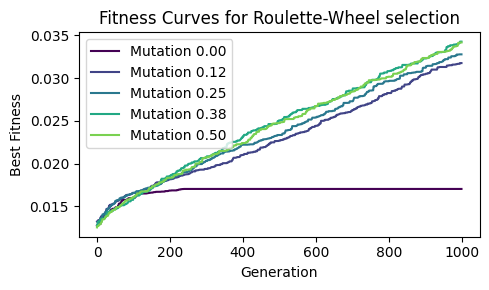

In [ ]:
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
mutation_range = np.linspace(0, 0.5, 5)

# Function to load CSV data
def load_csv_data_wheel(output_folder, mutation_range):
    data = {}
    for mutation in mutation_range:
        file_path = os.path.join(output_folder, f"mutation_{mutation}_wheel.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data[(mutation)] = df
    return data

# Load data
data = load_csv_data_wheel(output_folder, mutation_range)


fig, ax = plt.subplots(figsize=(5, 3))

for j, mutation in enumerate(mutation_range):
    if (mutation) in data:
        df = data[(mutation)]
        ax.plot(df['Generation'], df['Best Fitness'], label=f'Mutation {mutation:.2f}', color=plt.cm.viridis(j / len(mutation_range)))

ax.set_title(f'Fitness Curves for Roulette-Wheel selection')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness')
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show()


Increasing the mutation rate in both tournament selection and roulette wheel selection had a similar trend: it led to higher fitness values and faster convergence times. However, despite this trend, **tournament selection outperformed roulette** wheel selection significantly. Specifically, while the maximum fitness achieved using roulette wheel selection was 0.035, tournament selection reached a fitness of 0.3, which is ten times better. This stark difference highlights the superior effectiveness of tournament selection in this context, emphasizing its ability to produce fitter individuals and achieve more optimal solutions.

### **1.1.3 Increasing dimensionality**

I performed a detailed fine-tuning of the parameters "tournament_size" and "mutation_rate" using the 20x20 images. Through this process, I observed that tournament selection outperforms roulette wheel selection in terms of convergence speed and overall fitness, so I will only focus on that kind of selection also for this part.

Although it would be ideal to conduct this parameter analysis across all resolutions to find the best parameters suitable to specific pixel numbers, for this report, I will focus only on the 50x50 images to assess the scalability of these results.

If the behavior remains consistent, I will then extend the analysis to the 100x100 images, since I can safely assume that the trend will remain the same also in that case.

Even if higher resolution would require higher number of iterations to obtain similar results to its lower-resolution counterpart, I will limit the experiment to 1000 generations since my aim is just to observe the trends of these parameters, acknowledging that the expected fitness may be lower due to the reduced number of iterations.

In [ ]:
target_image_path = '/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png'
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
os.makedirs(output_folder, exist_ok=True)

target_image = Image.open(target_image_path).convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((50, 50))

target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

genome_size = len(target_image)

tournament_range = [3,6,10,12,15]
mutation_range = np.linspace(0, 0.5, 5)

for tournament in tournament_range:
    for mutation in mutation_range:
        print(tournament, mutation)
        run_evolution(100, genome_size, 256, target_image, 1000, 0.7, tournament, mutation, output_folder)

I will now visualize the results as before

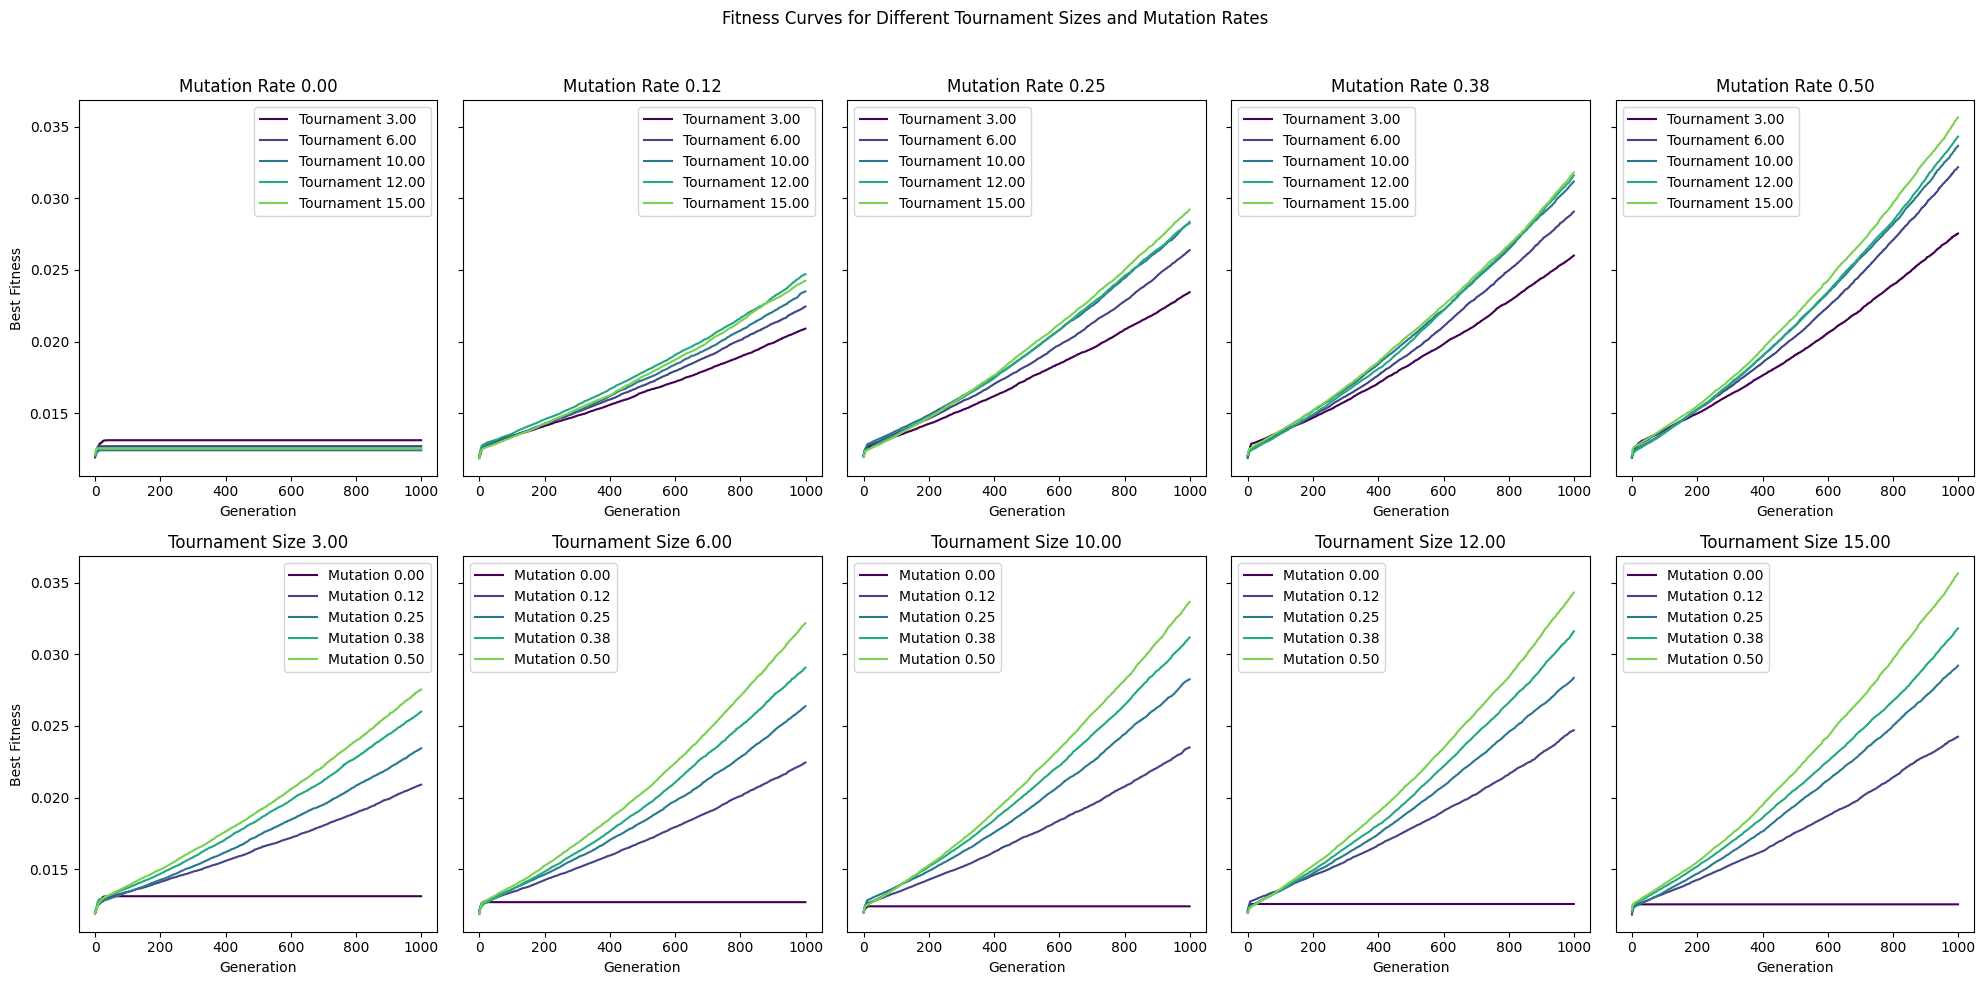

In [ ]:
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
tournament_range = [3,6,10,12,15]
mutation_range = np.linspace(0, 0.5, 5)

# Function to load CSV data
def load_csv_data(output_folder, tournament_range, mutation_range):
    data = {}
    for tournament in tournament_range:
        for mutation in mutation_range:
            file_path = os.path.join(output_folder, f"tournament_{tournament}_mutation_{mutation}_new_50x50.csv")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                data[(tournament, mutation)] = df
    return data

# Load data
data = load_csv_data(output_folder, tournament_range, mutation_range)

# Create plots
fig, axes = plt.subplots(2, len(mutation_range), figsize=(20, 10), sharey=True)

# Plot all fitness curves for every tournament value fixing a mutation rate
for j, mutation in enumerate(mutation_range):
    ax = axes[0, j]
    for i, tournament in enumerate(tournament_range):
        if (tournament, mutation) in data:
            df = data[(tournament, mutation)]
            ax.plot(df['Generation'], df['Best Fitness'], label=f'Tournament {tournament:.2f}', color=plt.cm.viridis(i / len(tournament_range)))
    ax.set_title(f'Mutation Rate {mutation:.2f}')
    ax.set_xlabel('Generation')
    if j == 0:
        ax.set_ylabel('Best Fitness')
    ax.legend()
    ax.grid(False)

# Plot all fitness curves for every mutation value fixing a tournament size
for i, tournament in enumerate(tournament_range):
    ax = axes[1, i]
    for j, mutation in enumerate(mutation_range):
        if (tournament, mutation) in data:
            df = data[(tournament, mutation)]
            ax.plot(df['Generation'], df['Best Fitness'], label=f'Mutation {mutation:.2f}', color=plt.cm.viridis(j / len(mutation_range)))
    ax.set_title(f'Tournament Size {tournament:.2f}')
    ax.set_xlabel('Generation')
    if i == 0:
        ax.set_ylabel('Best Fitness')
    ax.legend()
    ax.grid(False)

plt.suptitle('Fitness Curves for Different Tournament Sizes and Mutation Rates')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Upon completing the parameter analysis for the 50x50 images, I found trends similar to those observed with the 20x20 images. Specifically, increasing the mutation rate and tournament size led to faster convergence and improved fitness. This consistency suggests that the positive effects of these parameters are scalable across different resolutions. These findings reinforce the effectiveness of tournament selection and higher mutation rates in driving the evolutionary algorithm towards more optimal solutions.

Moreover, this consistency when generalizing to higher-dimensional images indicates that the insights gained from lower resolution images are broadly applicable. Therefore, I did not perform the subsequent analyses on higher resolution images, as we can reasonably expect similar results. This approach helps to avoid redundancy in the work while ensuring that the conclusions drawn are robust and applicable to different image resolutions. By focusing only on the first analysis for higher resolution images, we confirmed the generalizability of our findings without making the process overly repetitive or computationally prohibitive.

## **1.2 Comparing crossovers**

Until now, I have used only single-point crossover. However, we can also explore other crossover methods, such as multi-point crossover and uniform crossover. This analysis will be conducted on low-resolution images to ensure quicker results. I will start by redefining our evolutionary cycle to accommodate different crossover methods and save the results for future plotting. Given that a high mutation rate has proven effective for convergence, I will maintain the previously established mutation rate of 0.5. Similarly, I will use the previously determined optimal tournament size while comparing different crossover methods.

I will first give a brief explanation of the three methods, with advantages and advantages of all of them.

**Single-Point Crossover**

This method selects a random crossover point in the parents' genomes and swaps the segments after that point to create two offspring.

*   *Advantages*: Simple to implement and understand. Maintains large blocks of genetic information, which can be beneficial if these blocks represent important features.

*   *Disadvantages*: May cause premature convergence if beneficial genes are always swapped together, reducing diversity.

**Multi-Point Crossover**

This method selects multiple crossover points and alternates segments between the parents to create two offspring.

*   *Advantages*: Increases genetic diversity compared to single-point crossover by mixing genes more thoroughly and helps prevent premature convergence.

*   *Disadvantages*: More complex to implement. If too many crossover points are used, it can disrupt beneficial gene combinations and lead to less fit offspring.

**Uniform Crossover**

Each gene in the offspring is selected randomly from one of the parents, with equal probability.

*    *Advantages*: Maximizes genetic diversity by ensuring each gene has an independent chance of being inherited from either parent. Useful in maintaining high diversity in the population.

*    *Disadvantages*: Can disrupt beneficial gene combinations. May require more generations to converge to a solution due to high variability.

In [ ]:
def multi_point_crossover(parent1, parent2, points):
    points = sorted(random.sample(range(len(parent1.genome)), points))
    child1_genome, child2_genome = [], []
    for i in range(len(points) + 1):
        if i % 2 == 0:
            start = points[i-1] if i > 0 else 0
            end = points[i] if i < len(points) else len(parent1.genome)
            child1_genome.extend(parent1.genome[start:end])
            child2_genome.extend(parent2.genome[start:end])
        else:
            start = points[i-1] if i > 0 else 0
            end = points[i] if i < len(points) else len(parent1.genome)
            child1_genome.extend(parent2.genome[start:end])
            child2_genome.extend(parent1.genome[start:end])
    return Individual(np.array(child1_genome)), Individual(np.array(child2_genome))

def uniform_crossover(parent1, parent2):
    child1_genome, child2_genome = [], []
    for i in range(len(parent1.genome)):
        if random.random() < 0.5:
            child1_genome.append(parent1.genome[i])
            child2_genome.append(parent2.genome[i])
        else:
            child1_genome.append(parent2.genome[i])
            child2_genome.append(parent1.genome[i])
    return Individual(np.array(child1_genome)), Individual(np.array(child2_genome))

def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1.genome) - 1)
    offspring1 = parent1.genome[:point] + parent2.genome[point:]
    offspring2 = parent2.genome[:point] + parent1.genome[point:]
    return Individual(offspring1), Individual(offspring2)


In [ ]:
def evolutionary_cycle(population, target, tournament_size, mutation_rate, single_point, multi_point, uniform_cross, crossover_points=2):
    for ind in population:
        ind.fitness = calculate_fitness(ind, target)
    selected = [tournament_selection(population, tournament_size) for _ in population]
    offspring = []
    for i in range(0, len(population), 2):
        if single_point == True:
            off1, off2 = single_point_crossover(selected[i], selected[i + 1])
        elif multi_point == True:
            off1, off2 = multi_point_crossover(selected[i], selected[i + 1], crossover_points)
        elif uniform_cross == True:
            off1, off2 = uniform_crossover(selected[i], selected[i + 1])
        offspring.extend([off1, off2])
    # Mutation
    for ind in offspring:
        mutate(ind, mutation_rate, 256)
        ind.fitness = calculate_fitness(ind, target)
    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]  # top 2 elites
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population)-2])
    return new_population



def run_evolution_crossovers(pop_size, genome_length, value_range, target, max_generations, fitness_threshold, tournament_size, mutation_rate, output_folder, single_point = False, multi_point = False, uniform_cross = False, points = 1):
    population = initialize_population(pop_size, genome_length, value_range)
    csv_file_path = os.path.join(output_folder, f"population_comparison_20x20_uniform_{pop_size}.csv")
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Generation', 'Best Fitness'])

        for generation in range(max_generations):
            population = evolutionary_cycle(population, target, tournament_size, mutation_rate, single_point, multi_point, uniform_cross, crossover_points = points)
            best_fitness = max(ind.fitness for ind in population)
            writer.writerow([generation, best_fitness])
            if generation%100 ==0:
              print(f"Generation {generation}: Best Fitness {best_fitness}")
            if best_fitness >= fitness_threshold:
                break
    return


Here I save the values for **single point crossover**

In [ ]:
target_image_path = '/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png'
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
os.makedirs(output_folder, exist_ok=True)

target_image = Image.open(target_image_path).convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((20, 20))

target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

genome_size = len(target_image)


run_evolution_crossovers(100, genome_size, 256, target_image, 1000, 0.7, 12, 0.5, output_folder, single_point = True)

Generation 0: Best Fitness 0.013007707066436865
Generation 100: Best Fitness 0.02836074872376631
Generation 200: Best Fitness 0.046226742170345544
Generation 300: Best Fitness 0.06872852233676975
Generation 400: Best Fitness 0.09603841536614646
Generation 500: Best Fitness 0.1271860095389507
Generation 600: Best Fitness 0.1600640256102441
Generation 700: Best Fitness 0.19267822736030826
Generation 800: Best Fitness 0.2244668911335578
Generation 900: Best Fitness 0.2682763246143528


Then for **multi-point crossover** with a different number of points. This is crucial because choosing too many would result in a similar behaviour than uniform, while too small may be not too significant.

In [ ]:
points = [2,5,10,25,50]

for point in points:
  print(point)
  run_evolution_crossovers(100, genome_size, 256, target_image, 1000, 0.7, 12, 0.5, output_folder, multi_point = True, points = point)

2
Generation 0: Best Fitness 0.013256885294799986
Generation 100: Best Fitness 0.030184123151222455
Generation 200: Best Fitness 0.04981940465811433
Generation 300: Best Fitness 0.07541478129713423
Generation 400: Best Fitness 0.10395010395010396
Generation 500: Best Fitness 0.13596193065941536
Generation 600: Best Fitness 0.17429193899782136
Generation 700: Best Fitness 0.21231422505307856
Generation 800: Best Fitness 0.23752969121140144
Generation 900: Best Fitness 0.2680965147453083
5
Generation 0: Best Fitness 0.013245910325187097
Generation 100: Best Fitness 0.032331070158422244
Generation 200: Best Fitness 0.05809731299927379
Generation 300: Best Fitness 0.09411764705882353
Generation 400: Best Fitness 0.1322751322751323
Generation 500: Best Fitness 0.17189514396218308
Generation 600: Best Fitness 0.2119766825649179
Generation 700: Best Fitness 0.2506265664160401
Generation 800: Best Fitness 0.28776978417266186
Generation 900: Best Fitness 0.32310177705977383
10
Generation 0: Bes

Finally for **uniform crossover**

In [ ]:
run_evolution_crossovers(100, genome_size, 256, target_image, 1000, 0.7, 12, 0.5, output_folder, uniform_cross = True)

Generation 0: Best Fitness 0.013167857260427298
Generation 100: Best Fitness 0.040729049994908874
Generation 200: Best Fitness 0.06883496816382723
Generation 300: Best Fitness 0.10314595152140278
Generation 400: Best Fitness 0.14630577907827358
Generation 500: Best Fitness 0.19065776930409914
Generation 600: Best Fitness 0.23001725129384704
Generation 700: Best Fitness 0.26613439787092485
Generation 800: Best Fitness 0.306044376434583
Generation 900: Best Fitness 0.3475238922675934


I will now plot the different fitness curves for various values of points in the multi-point crossover.

Using different numbers of crossover points allows for varying degrees of genetic mixing. With fewer points, the crossover retains larger blocks of genetic information, which can be beneficial if those blocks represent important features. With more points, the crossover increases diversity but may disrupt these blocks.

Experimenting with different numbers of points helps to find a balance between maintaining important gene combinations and ensuring sufficient genetic diversity.

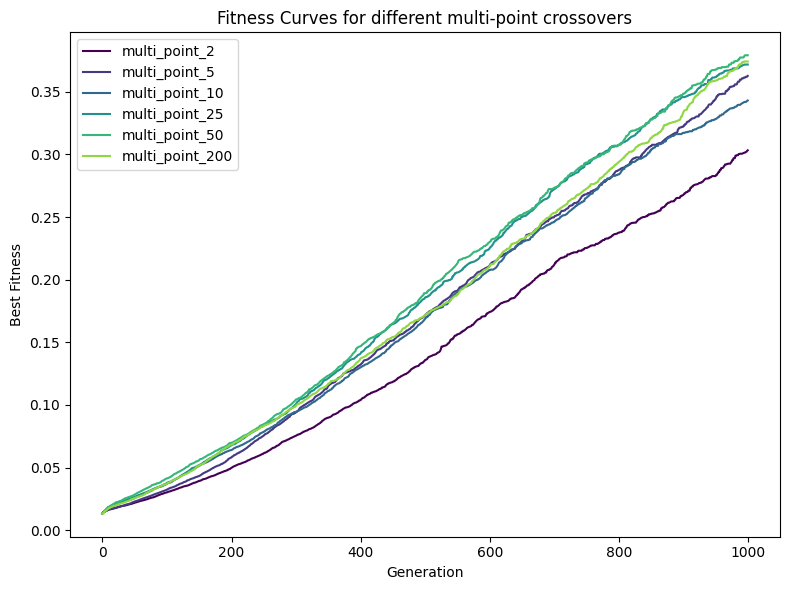

In [ ]:
import pandas as pd
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
crossovers = ['multi_point_2','multi_point_5', 'multi_point_10', 'multi_point_25', 'multi_point_50','multi_point_200']

# Function to load CSV data
def load_csv_data_wheel(output_folder, crossovers):
    data = {}
    for crossover in crossovers:
        file_path = os.path.join(output_folder, f"crossovers_comparison_20x20_{crossover}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data[(crossover)] = df
    return data

# Load data
data = load_csv_data_wheel(output_folder, crossovers)


fig, ax = plt.subplots(figsize=(8, 6))

for j, crossover in enumerate(crossovers):
    if (crossover) in data:
        df = data[(crossover)]
        ax.plot(df['Generation'], df['Best Fitness'], label=f'{crossover}', color=plt.cm.viridis(j/ len(crossovers)))

ax.set_title(f'Fitness Curves for different multi-point crossovers')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness')
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show();


We observe an interesting behaviour regarding the performance variation with Multi-Point Crossover.

Increasing the number of crossover points in multi-point crossover initially enhances performance because it promotes greater genetic diversity among offspring. With a small number of crossover points (e.g., 2 to 25/50), the mixing of genetic material between parents is more balanced, leading to offspring that can explore a broader range of the solution space. This diversity is crucial for avoiding premature convergence and discovering high-quality solutions. However, as the number of crossover points approaches 200, the crossover process begins to resemble a random shuffling of genes rather than a meaningful recombination. This excessive randomness disrupts the coherence of beneficial gene combinations, leading to offspring that are less fit on average. Thus, the performance worsens because the algorithm loses the ability to effectively combine and propagate advantageous traits through the population.

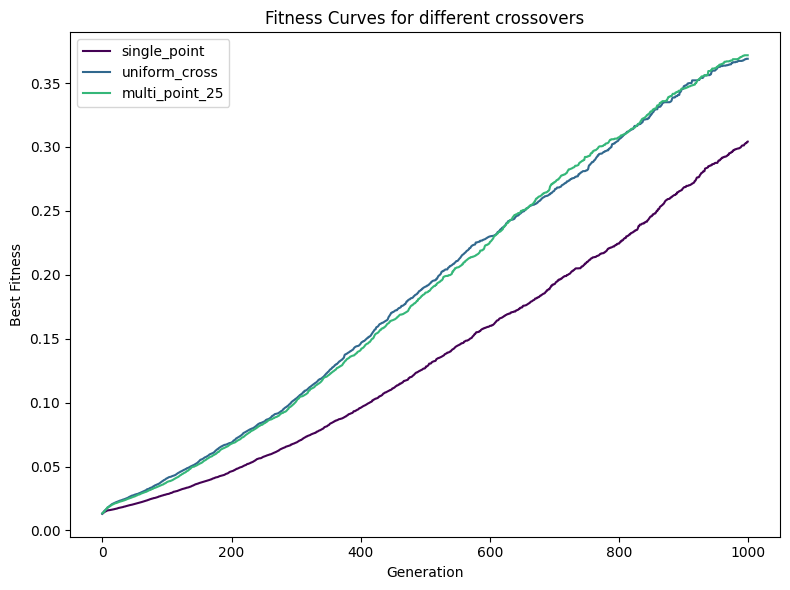

In [ ]:
import pandas as pd
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
crossovers = ['single_point', 'uniform_cross', 'multi_point_25']

# Function to load CSV data
def load_csv_data_wheel(output_folder, crossovers):
    data = {}
    for crossover in crossovers:
        file_path = os.path.join(output_folder, f"crossovers_comparison_20x20_{crossover}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data[(crossover)] = df
    return data

# Load data
data = load_csv_data_wheel(output_folder, crossovers)


fig, ax = plt.subplots(figsize=(8, 6))

for j, crossover in enumerate(crossovers):
    if (crossover) in data:
        df = data[(crossover)]
        ax.plot(df['Generation'], df['Best Fitness'], label=f'{crossover}', color=plt.cm.viridis(j/ len(crossovers)))

ax.set_title(f'Fitness Curves for different crossovers')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness')
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show();


The performance of multi-point crossover with 25 points being similar to uniform crossover can be attributed to the comparable levels of genetic mixing they introduce. Both methods effectively combine genetic material from both parents without heavily biasing towards one particular genome structure, allowing for a more thorough exploration of the solution space. Uniform crossover, which probabilistically assigns each gene from either parent, ensures a high degree of genetic diversity and robustness. This reduces the chances of parameter biases affecting the outcome, unlike single-point crossover, which limits the recombination to a single point, often leading to less diverse and potentially suboptimal solutions.

Consequently, uniform crossover promotes faster convergence to high-quality solutions, making it the preferred method moving forward due to its balance of exploration and exploitation, along with its parameter-insensitivity.

## **1.3 Population Size comparison**

In this last section, we will investigate the impact of varying the number of individuals in the population on the overall fitness of the evolutionary algorithm. To ensure consistency and reliability in our analysis, we will use the tournament size and mutation rate identified as optimal in our initial analysis. Furthermore, we will utilize the uniform crossover method, which has demonstrated superior performance in our previous experiments. By plotting fitness curves for different population sizes, we aim to understand how population size influences the convergence rate and the quality of solutions.

In [ ]:
population_sizes = [20,50,100,200, 500, 1000]

for population_size in population_sizes:
  run_evolution_crossovers(population_size, genome_size, 256, target_image, 1000, 0.7, 12, 0.5, output_folder, uniform_cross = True)

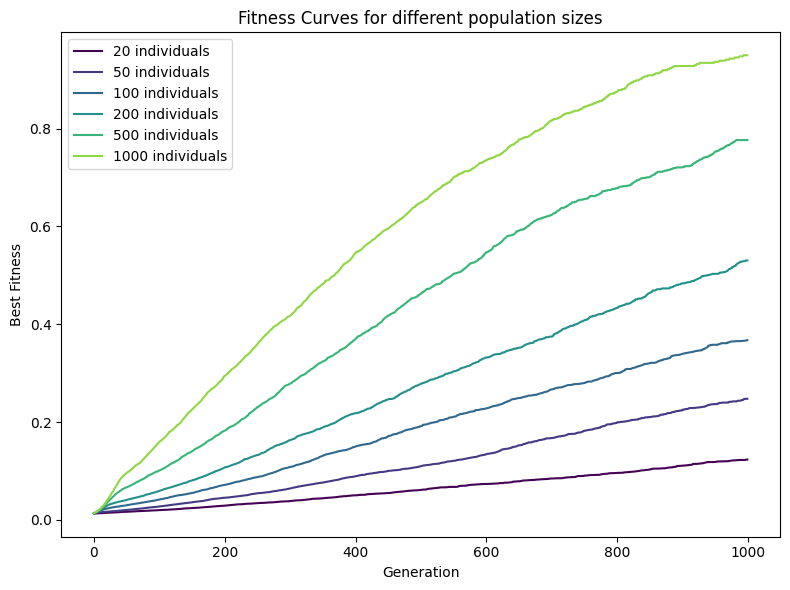

In [ ]:
import pandas as pd
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
population_sizes = [20,50,100,200, 500, 1000]

# Function to load CSV data
def load_csv_data_wheel(output_folder, crossovers):
    data = {}
    for pop in population_sizes:
        file_path = os.path.join(output_folder, f"population_comparison_20x20_uniform_{pop}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data[(pop)] = df
    return data

# Load data
data = load_csv_data_wheel(output_folder, population_sizes)


fig, ax = plt.subplots(figsize=(8, 6))

for j, pop in enumerate(population_sizes):
    if (pop) in data:
        df = data[(pop)]
        ax.plot(df['Generation'], df['Best Fitness'], label=f'{pop} individuals', color=plt.cm.viridis(j/ len(population_sizes)))

ax.set_title(f'Fitness Curves for different population sizes')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness')
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show();


I performed various evolutions with different numbers of individuals in the population and observed that increasing the number of individuals significantly improves both fitness and convergence speed. For example, with a population of 1000 individuals, we nearly reached a perfect fitness score of 1, whereas with only 20 individuals, the fitness did not exceed 0.2. This phenomenon can be attributed to the increased genetic diversity present in larger populations, which provides a broader pool of potential solutions. This diversity enhances the algorithm's ability to explore the solution space effectively, preventing premature convergence to suboptimal solutions. Additionally, larger populations improve the statistical robustness of selection mechanisms, ensuring that high-quality genes are more likely to be propagated through successive generations. Thus, the algorithm converges more quickly and accurately towards optimal solutions.

## **2. Visualization**

Now I will perform some visualization to better understand what is happening behind the algorithm. This can offer the reader meaningful insights in how evolutionary algorithm make images converge to a desired target.

For the visualization part, I chose to use a population of 100 individuals and single-point crossover. This decision was made to speed up computations, even though the best methods identified were uniform crossover and larger populations. The purpose of this section is to aid reader comprehension rather than achieve optimal results, and running extensive analyses on higher resolution images can be computationally expensive and time-consuming, potentially taking several days to converge. Thus, simplifying these parameters allows us to provide clear, illustrative examples without unnecessary delays, while still conveying the essential concepts effectively.

### **2.1 Visualizing 20x20 Images**

To begin, I will conduct a visualization using the lowest resolution image, 20x20 pixels. This choice is based on the fact that images at this resolution converge in fewer iterations, making the process of convergence more evident. By starting with a smaller image, the evolutionary algorithm can quickly demonstrate its ability to transform random noise into a recognizable target image. The simplicity of the lower resolution allows us to clearly observe the stages of evolution, making it an ideal starting point for demonstrating the algorithm's effectiveness.

Firstly, I will plot the image we aim to reach, and the image we start with.

(-0.5, 19.5, 19.5, -0.5)

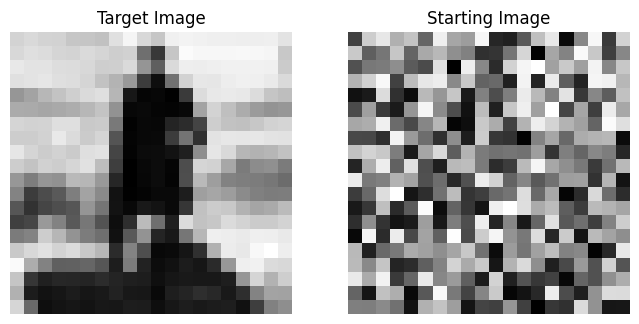

In [ ]:
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((20, 20))
target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

pop_size = 100
genome_length = 20 * 20   # grayscale image
value_range = 256
max_generations = 2500
fitness_threshold = 0.9
tournament_size = 12
mutation_rate = 0.5

population = initialize_population(pop_size, genome_length, value_range)
population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)

best_initial_image = max(population, key=lambda x: x.fitness)

fig, ax = plt.subplots(1,2, figsize = (8,16))

ax[0].imshow(np.array(target_image).reshape((20,20)), cmap = 'gray')
ax[0].set_title('Target Image')
ax[0].axis('off')
ax[1].imshow(np.array(best_initial_image.genome).reshape((20,20)), cmap = 'gray')
ax[1].set_title('Starting Image')
ax[1].axis('off')



In [ ]:
population = initialize_population(pop_size, genome_length, value_range)

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(np.zeros((20, 20)), cmap='gray')  # Placeholder for the evolving image
generation_interval = 100  # Define the interval to update the animation

def update(frame):
    global population
    if frame == 0:
        best_individual = population[0]
        best_image = np.reshape(best_individual.genome, (20, 20))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]
    else:
        for _ in range(generation_interval):
            population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)
        best_individual = max(population, key=lambda x: x.fitness)
        best_image = np.reshape(best_individual.genome, (20, 20))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]

ani = animation.FuncAnimation(fig, update, frames=max_generations // generation_interval, blit=True)

# Save the animation as a GIF (or you can use other formats like 'mp4')
ani.save('population_evolution_2.gif', writer='imagemagick')


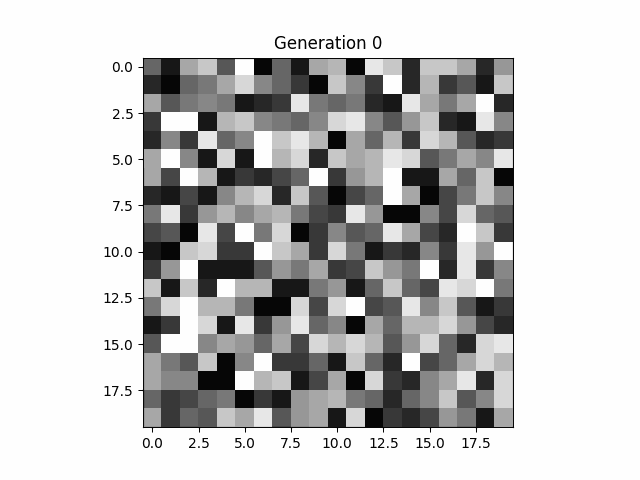

In [ ]:
gifPath = "/content/population_evolution_2.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

### **2.2. Visualizing 50x50 images**

Following the initial demonstration with the 20x20 resolution, I am now progressing to images with a resolution of 50x50 pixels. This intermediate step provides a balance between the simplicity of low resolution and the detail of higher resolution images. While requiring more iterations to converge compared to 20x20 images, 50x50 images offer a more detailed representation of the target image, thus allowing for a better appreciation of the evolutionary process. This step is crucial for illustrating the scalability of the algorithm and its ability to handle increased complexity.

Text(0.5, 1.0, 'Target Image')

(-0.5, 49.5, 49.5, -0.5)

Text(0.5, 1.0, 'Starting Image')

(-0.5, 49.5, 49.5, -0.5)

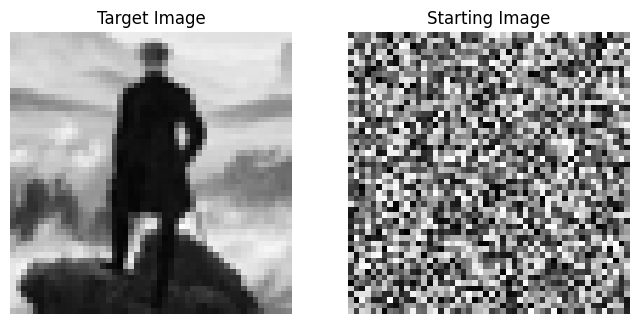

In [ ]:
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((50, 50))
target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

pop_size = 100
genome_length = 50 * 50   # grayscale image
value_range = 256
max_generations = 5000
fitness_threshold = 0.9
tournament_size = 12
mutation_rate = 0.5

population = initialize_population(pop_size, genome_length, value_range)
population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)

best_initial_image = max(population, key=lambda x: x.fitness)

fig, ax = plt.subplots(1,2, figsize = (8,16))

ax[0].imshow(np.array(target_image).reshape((50,50)), cmap = 'gray')
ax[0].set_title('Target Image')
ax[0].axis('off')
ax[1].imshow(np.array(best_initial_image.genome).reshape((50,50)), cmap = 'gray')
ax[1].set_title('Starting Image')
ax[1].axis('off')



In [ ]:
population = initialize_population(pop_size, genome_length, value_range)

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(np.zeros((50, 50)), cmap='gray')  # Placeholder for the evolving image
generation_interval = 100  # Define the interval to update the animation

def update(frame):
    global population
    if frame == 0:
        best_individual = population[0]
        best_image = np.reshape(best_individual.genome, (50, 50))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]
    else:
        for _ in range(generation_interval):
            population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)
        best_individual = max(population, key=lambda x: x.fitness)
        best_image = np.reshape(best_individual.genome, (50, 50))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]

ani = animation.FuncAnimation(fig, update, frames=max_generations // generation_interval, blit=True)

# Save the animation as a GIF (or you can use other formats like 'mp4')
ani.save('population_evolution_3.gif', writer='imagemagick')


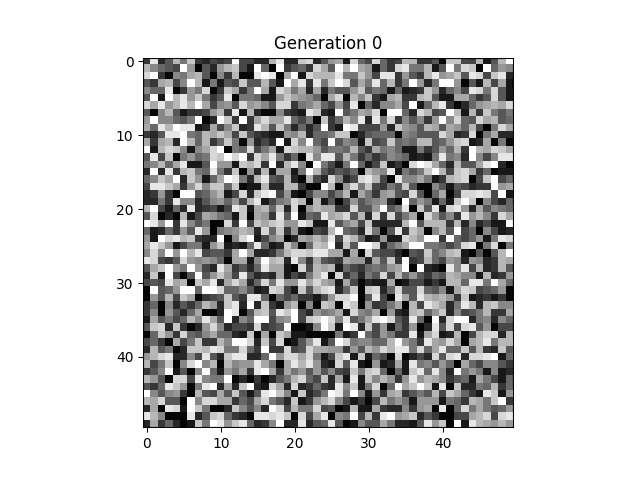

In [ ]:
gifPath = "/content/population_evolution_3.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

### **2.3 Visualizing 100x100 images**

For higher-resolution images, specifically those with dimensions 100x100 pixels, I performed visualizations primarily because they are more visually appealing. However, achieving good convergence would require running the evolutionary algorithm for a significantly larger number of generations. This is due to the increased complexity and larger genome size, which demand more computational resources and time for the algorithm to effectively optimize the image reconstruction.

Text(0.5, 1.0, 'Target Image')

(-0.5, 99.5, 99.5, -0.5)

Text(0.5, 1.0, 'Starting Image')

(-0.5, 99.5, 99.5, -0.5)

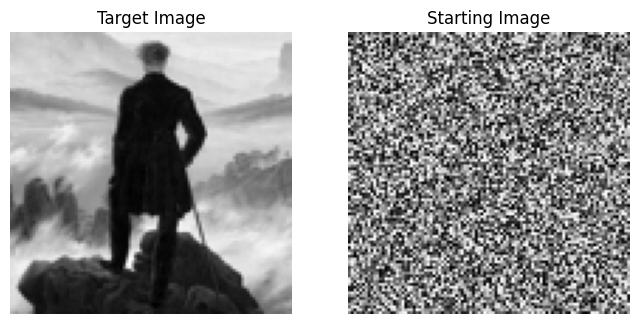

In [ ]:
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to grayscale
target_image = target_image.resize((100, 100))
target_image = np.array(target_image)
target_image = list(target_image.flatten())  # Simulated target image

pop_size = 100
genome_length = 100 * 100   # grayscale image
value_range = 256
max_generations = 10000
fitness_threshold = 0.9
tournament_size = 12
mutation_rate = 0.5

population = initialize_population(pop_size, genome_length, value_range)
population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)

best_initial_image = max(population, key=lambda x: x.fitness)

fig, ax = plt.subplots(1,2, figsize = (8,16))

ax[0].imshow(np.array(target_image).reshape((100,100)), cmap = 'gray')
ax[0].set_title('Target Image')
ax[0].axis('off')
ax[1].imshow(np.array(best_initial_image.genome).reshape((100,100)), cmap = 'gray')
ax[1].set_title('Starting Image')
ax[1].axis('off')



In [ ]:

population = initialize_population(pop_size, genome_length, value_range)

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(np.zeros((100, 100)), cmap='gray')  # Placeholder for the evolving image
generation_interval = 500  # Define the interval to update the animation

def update(frame):
    global population
    if frame == 0:
        print(frame)
        best_individual = population[0]
        best_image = np.reshape(best_individual.genome, (100, 100))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]
    else:
        for _ in range(generation_interval):
            population = evolutionary_cycle(population, target_image, tournament_size, mutation_rate)
        print(frame)
        best_individual = max(population, key=lambda x: x.fitness)
        best_image = np.reshape(best_individual.genome, (100, 100))
        im.set_array(best_image)
        ax.imshow(best_image, cmap = 'gray')
        ax.set_title(f'Generation {frame * generation_interval}')
        return [im]

ani = animation.FuncAnimation(fig, update, frames=max_generations // generation_interval, blit=True)

# Save the animation as a GIF (or you can use other formats like 'mp4')
ani.save('population_evolution_4.gif', writer='imagemagick')


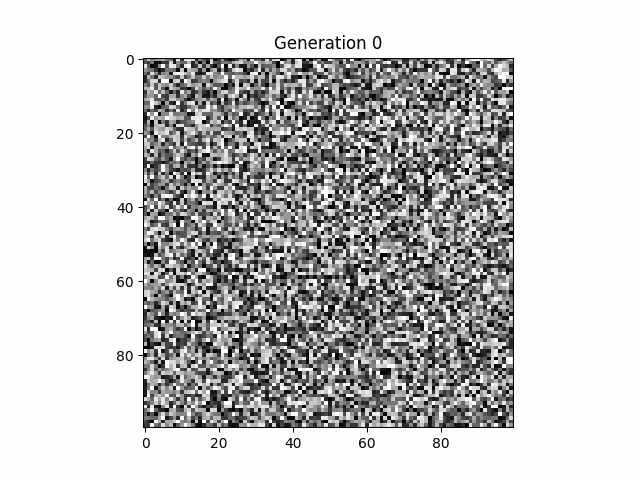

In [ ]:
gifPath = "/content/population_evolution_4.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

# **Representing images as graphs**

In the graph-based representation of an image, each pixel is treated as a node in a graph, and edges are created between neighboring pixels. This graph structure captures the spatial relationships between pixels, which is an important aspect of images. The nodes have an attribute 'color' that stores the pixel value (intensity in grayscale images).

The fitness of an individual in this representation is calculated by comparing the color values of nodes in the generated graph with the target image. The evolutionary operations such as mutation and crossover are performed by modifying the color values of nodes and exchanging patches of the graph between individuals, respectively.

this kind of representation has both advantages and disadvantages.

**Advantages**

*   *Spatial Relationship Preservation*: Unlike the flattened representation, the graph-based representation preserves the spatial relationships between pixels, which can be crucial for capturing the structure of the image.
*   *Flexible Manipulation*: The graph structure allows flexible manipulations, such as altering local patches, which can be more effective than altering individual pixels in isolation.

**Disadvantages**

*   *Increased Complexity*: The graph representation introduces additional complexity in terms of data structure and operations, which can slow down the evolutionary process.
*   *Memory Overhead*: Storing and manipulating graph structures can consume more memory compared to a flattened array, especially for large images.


For graph-based image representations, the graph's nodes and edges undergo evolutionary operations. The graph structure allows for more natural modifications and better preservation of spatial coherence, potentially leading to more effective evolution of image representations.

In order to be even more precise, I will also provide the various dimensionalities we now have.

For an image of dimensions  $\text{M}\times\text{N}$ :

*   **Number of Nodes** :  $\text{M}\times\text{N}$, since there is a nod efor every pixel.
*   **Number of edges** : $\text{2M}\times\text{(N}-1) + \text{2(}\text{N}\times(\text{M}-1))$, since each node, except those on the borders, has edges to its four immediate neighbors.

## **1. Explanation of Crossover and Mutation Operations on Graphs**


Let's break down how an evolutionary algorithm operates on graphs.

**Crossover Operation**

The crossover operation combines the genomes of two parent individuals to produce offspring. In the context of the graph-based image representation, the genome consists of the color values of the nodes (pixels) in the graph.

The procedure follows the same steps as before, with some modifications:

*   *Parent Selection*: Two parent graphs are selected from the population.
*   *Uniform Crossover*: With a certain probability, the pixel value of a number of nodes in the first parent is exchanged with the second parent.
*   *Exchange Pixel Values*: The pixel values (node colors) of the two parent graphs are exchanged at the crossover point, creating two new offspring graphs.

**Example**

Let's say we have two parent graphs representing a 4x4 image (16 pixels):

Parent 1 Pixel Values: [**12, 34, 56, 78, 90, 123, 145, 167**, 189, 201, 223, 245, 11, 22, 33, 44]

Parent 2 Pixel Values: [44, 33, 22, 11, 245, 223, 201, 189, **167, 145, 123, 90, 78, 56, 34, 12**]

If the crossover point is 8 (halfway), the offspring will be:

Offspring 1 Pixel Values: [12, 34, 56, 78, 90, 123, 145, 167, 167, 145, 123, 90, 78, 56, 34, 12]

Offspring 2 Pixel Values: [44, 33, 22, 11, 245, 223, 201, 189, 189, 201, 223, 245, 11, 22, 33, 44]

The crossover operation ensures that the structure and position of the graph (grid layout) are maintained because only the node (pixel) values are swapped.

**Mutation**

The mutation operation introduces random changes to an individual’s genome to maintain genetic diversity in the population and avoid premature convergence.

*   *Random Selection*: A random node (pixel) in the graph is selected.
*   *Color Value Change*: The color value of this node is changed to a random new value within the permissible range.

**Example**

Consider a graph with the following pixel values for a 4x4 image:

Original Pixel Values: [12, 34, 56, 78, **90**, 123, 145, 167, 189, 201, 223, 245, 11, 22, 33, 44]

If a random mutation point is 4, and the new color value is 200, the mutated graph will have:

Mutated Pixel Values: [12, 34, 56, 78, **200**, 123, 145, 167, 189, 201, 223, 245, 11, 22, 33, 44]

Again, the structure and position of the graph are maintained because only the value of a node (pixel) is altered.

## **2. Running the Algorithm and Visualizing**

I will now perform the evolutionary cicle I mentioned above. Moreover, I will offer a visualization of the graph we are using for better clarification.

Generation 0: Best Fitness 0.0132139671632916
Generation 100: Best Fitness 0.040205045733239526
Generation 200: Best Fitness 0.06266645777847407
Generation 300: Best Fitness 0.08710801393728222
Generation 400: Best Fitness 0.11570726063060457
Generation 500: Best Fitness 0.14603870025556773


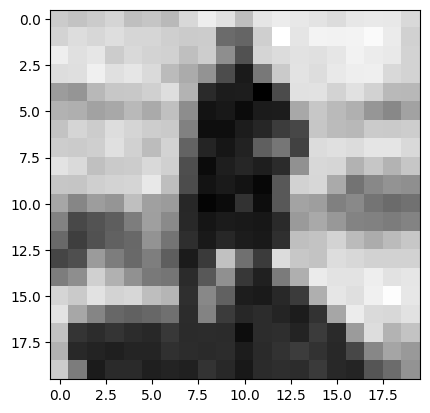

In [ ]:
import numpy as np
import random
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv

class GraphIndividual:
    def __init__(self, graph):
        self.graph = graph
        self.fitness = None

def initialize_population(pop_size, target_image):
    population = []
    for _ in range(pop_size):
        G = nx.grid_2d_graph(target_image.shape[0], target_image.shape[1])
        for (i, j) in G.nodes():
            G.nodes[i, j]['color'] = random.randint(0, 255)
        population.append(GraphIndividual(G))
    return population

def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        mutation_node = random.choice(list(individual.graph.nodes()))
        individual.graph.nodes[mutation_node]['color'] = random.randint(0, 255)

def calculate_fitness_graph(individual, target_image):
    total_error = 0
    for (i, j) in individual.graph.nodes():
        total_error += abs(individual.graph.nodes[i, j]['color'] - target_image[i, j])
    error = total_error / (target_image.shape[0] * target_image.shape[1])
    return 1 / (1 + error)

def crossover(parent1, parent2):
    offspring1_graph = parent1.graph.copy()
    offspring2_graph = parent2.graph.copy()
    for node in offspring1_graph.nodes():
        if random.random() < 0.5:
            offspring1_graph.nodes[node]['color'] = parent2.graph.nodes[node]['color']
            offspring2_graph.nodes[node]['color'] = parent1.graph.nodes[node]['color']
    return GraphIndividual(offspring1_graph), GraphIndividual(offspring2_graph)

def tournament_selection_graph(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda ind: ind.fitness)

def evolutionary_cycle_graph(population, target_image, tournament_size, mutation_rate):
    for ind in population:
        ind.fitness = calculate_fitness_graph(ind, target_image)
    selected = [tournament_selection_graph(population, tournament_size) for _ in population]
    offspring = []
    for i in range(0, len(population), 2):
        off1, off2 = crossover(selected[i], selected[i + 1])
        offspring.extend([off1, off2])
    for ind in offspring:
        mutate(ind, mutation_rate)
        ind.fitness = calculate_fitness_graph(ind, target_image)
    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]  # top 2 elites
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population) - 2])
    return new_population

def run_evolution_graph(pop_size, target_image, max_generations, fitness_threshold, tournament_size, mutation_rate, output_folder):
    population = initialize_population(pop_size, target_image)
    for generation in range(max_generations):
        population = evolutionary_cycle_graph(population, target_image, tournament_size, mutation_rate)
        best_fitness = max(ind.fitness for ind in population)
        if generation % 100 == 0:
            print(f"Generation {generation}: Best Fitness {best_fitness}")
        if best_fitness >= fitness_threshold:
            break
    return population

def visualize_result_graph(individual, target_shape):
    generated_image = np.zeros(target_shape, dtype=np.uint8)
    for (i, j) in individual.graph.nodes():
        generated_image[i, j] = individual.graph.nodes[i, j]['color']
    plt.imshow(generated_image, cmap='gray')
    plt.show()

def visualize_graph_structure(individual, target_shape):
    pos = {(i, j): (j, -i) for i in range(target_shape[0]) for j in range(target_shape[1])}
    colors = [individual.graph.nodes[node]['color'] for node in individual.graph.nodes()]
    nx.draw(individual.graph, pos, node_color=colors, node_size=50, cmap=plt.cm.gray)
    plt.show()

# Load and preprocess the target image
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')
target_image = target_image.resize((20, 20))
target_image = np.array(target_image)

# Run evolution
population = run_evolution_graph(100, target_image, 1000, 0.15, 10, 0.3, '/content/drive/MyDrive/evolutionary_algorithms')

# Get the best individual based on fitness
best_individual = max(population, key=lambda ind: ind.fitness)

# Visualize final result
visualize_result_graph(best_individual, target_image.shape)


It is interesting to note that this kind of representation converged faster than the previous one. Indeed, after less than 400 iterations, it reached 0.1 of fitness value, while previously it needed more than 500 iterations. One problem with this, however, is that the memory allocation of graphs is much more expensive that the one of arrays, thus the overall computation is significantly slower.

We can also visualize the graph structure for better understanding. We see that it keeps the spatial relationships between the various pixels, and only the values of the nodes evolve over time.

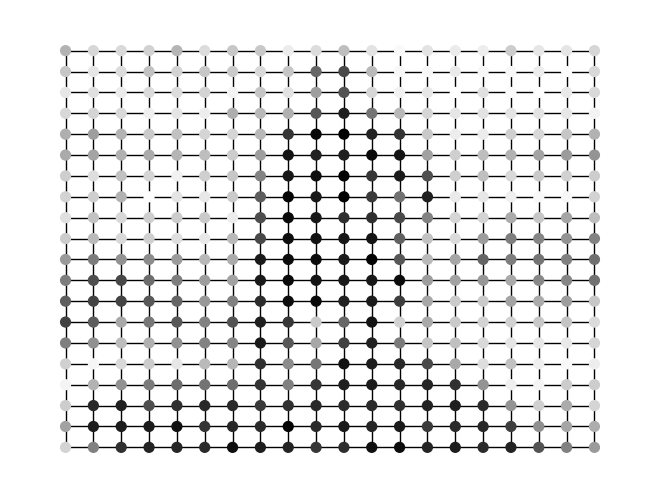

In [ ]:
# Visualize graph structure
visualize_graph_structure(best_individual, target_image.shape)

# **Representing Images as Patches**

In this approach, an image is divided into smaller, non-overlapping patches, and each patch is treated as an individual unit within the genetic algorithm. This method focuses on evolving each patch separately, and then combining them to reconstruct the final image. The genome of each individual in the population consists of the pixel values of these patches.

To initialize the population, the target image is divided into smaller patches of a specified size (e.g., 4x4 pixels). Each individual in the population is represented by a list of these patches, where each patch is a flattened array of pixel values.

*Example*<br>
Consider a 4x4 image divided into four 2x2 patches:

**Patch 1**: [12, 34, 56, 78]<br>
**Patch 2**: [90, 123, 145, 167]<br>
**Patch 3**: [189, 201, 223, 245]<br>
**Patch 4**: [11, 22, 33, 44]<br>

An individual in the population will be represented as:<br>
**Individual**: [ [12, 34, 56, 78], [90, 123, 145, 167], [189, 201, 223, 245], [11, 22, 33, 44] ]

For what regards the evolutionary cycle, we will perform the following operations:

*   **Crossover**: during crossover, two parent individuals exchange parts of their patches to produce offspring. A random crossover point is chosen within each patch, and the pixel values are exchanged beyond this point.

*Example*<br>
Two parent individuals might have the following patches:

**Parent 1**: [ [12, 34, 56, 78], [90, 123, **145**, 167], [189, 201, 223, 245], [11, 22, 33, 44] ]<br>
**Parent 2**: [ [44, 33, 22, 11], [245, 223, **201**, 189], [167, 145, 123, 90], [78, 56, 34, 12] ]

If the crossover point within each patch is **2**:<br>
Offspring 1: [[12, 34, 22, 11], [90, 123, **201**, 189], [189, 201, 123, 90], [11, 22, 34, 12]]<br>
Offspring 2: [[44, 33, 56, 78], [245, 223, **145**, 167], [167, 145, 223, 245], [78, 56, 33, 44]]

*   **Mutation**: mutation introduces variability by randomly changing the pixel values in one of the patches. This ensures diversity and prevents premature convergence.

*Example*<br>
Consider an individual with the following patches:

**Individual**: [ [12, 34, 56, **78**], [90, 123, 145, 167], [189, 201, 223, 245], [11, 22, 33, 44] ]

If a random mutation point is chosen in the first patch and the new value is **200**:

**Mutated Individual**: [ [12, 34, 56, **200**], [90, 123, 145, 167], [189, 201, 223, 245], [11, 22, 33, 44] ]

* **Fitness**: the fitness of each individual is calculated based on how closely the reconstructed image from its patches matches the target image. The error is computed as the sum of absolute differences between the pixel values of the individual's patches and the corresponding target patches.

The evolutionary cycle then proceeds as before.

Generation 0: Best Fitness 0.013440860215053762
Generation 100: Best Fitness 0.03517101908027785
Generation 200: Best Fitness 0.06128389765589091
Generation 300: Best Fitness 0.0906412871062769
Generation 400: Best Fitness 0.12511729746637473
Generation 500: Best Fitness 0.1631986944104447


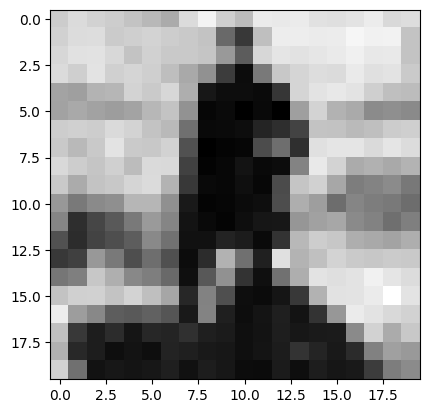

In [ ]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv

class PatchIndividual:
    def __init__(self, patches):
        self.patches = patches
        self.fitness = None

def divide_into_patches(image, patch_size):
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i+patch_size, j:j+patch_size].flatten()
            patches.append(patch)
    return patches

def initialize_population_patch(pop_size, patch_size, value_range, num_patches):
    return [PatchIndividual([[random.randint(0, value_range - 1) for _ in range(patch_size * patch_size)] for _ in range(num_patches)]) for _ in range(pop_size)]

def mutate_patch(individual, mutation_rate, value_range):
    if random.random() < mutation_rate:
        patch_index = random.randint(0, len(individual.patches) - 1)
        gene_index = random.randint(0, len(individual.patches[patch_index]) - 1)
        individual.patches[patch_index][gene_index] = random.randint(0, value_range - 1)

def calculate_fitness_patch(individual, target_patches):
    total_error = 0
    for i, patch in enumerate(individual.patches):
        total_error += np.sum(np.abs(np.array(patch) - np.array(target_patches[i])))
    error = total_error / (len(target_patches) * len(target_patches[0]))
    return 1 / (1 + error)

def crossover_patch(parent1, parent2):
    offspring1_patches = []
    offspring2_patches = []
    for patch1, patch2 in zip(parent1.patches, parent2.patches):
        point = random.randint(1, len(patch1) - 1)
        offspring1_patch = np.concatenate([patch1[:point], patch2[point:]])
        offspring2_patch = np.concatenate([patch2[:point], patch1[point:]])
        offspring1_patches.append(offspring1_patch)
        offspring2_patches.append(offspring2_patch)
    return PatchIndividual(offspring1_patches), PatchIndividual(offspring2_patches)

def tournament_selection_patch(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda ind: ind.fitness)

def evolutionary_cycle_patch(population, target_patches, tournament_size, mutation_rate):
    for ind in population:
        ind.fitness = calculate_fitness_patch(ind, target_patches)
    selected = [tournament_selection_patch(population, tournament_size) for _ in population]
    offspring = []
    for i in range(0, len(population), 2):
        off1, off2 = crossover_patch(selected[i], selected[i + 1])
        offspring.extend([off1, off2])
    for ind in offspring:
        mutate_patch(ind, mutation_rate, 256)
        ind.fitness = calculate_fitness_patch(ind, target_patches)
    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]  # top 2 elites
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population) - 2])
    return new_population

def run_evolution_patch(pop_size, target_image, patch_size, max_generations, fitness_threshold, tournament_size, mutation_rate, output_folder):
    target_patches = divide_into_patches(target_image, patch_size)
    num_patches = len(target_patches)
    population = initialize_population_patch(pop_size, patch_size, 256, num_patches)
    for generation in range(max_generations):
        population = evolutionary_cycle_patch(population, target_patches, tournament_size, mutation_rate)
        best_fitness = max(ind.fitness for ind in population)
        if generation % 100 == 0:
            print(f"Generation {generation}: Best Fitness {best_fitness}")
        if best_fitness >= fitness_threshold:
            break
    return population

def visualize_result_patch(individual, target_shape, patch_size):
    reconstructed_image = np.zeros(target_shape, dtype=np.uint8)
    patch_idx = 0
    for i in range(0, target_shape[0], patch_size):
        for j in range(0, target_shape[1], patch_size):
            patch = np.array(individual.patches[patch_idx]).reshape((patch_size, patch_size))
            reconstructed_image[i:i+patch_size, j:j+patch_size] = patch
            patch_idx += 1
    plt.imshow(reconstructed_image, cmap='gray')
    plt.show()

# Load and preprocess the target image
target_image = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')
target_image = target_image.resize((20, 20))
target_image = np.array(target_image)

# Run evolution
population = run_evolution_patch(100, target_image, 4, 1000, 0.2, 12, 0.5, '/content/drive/MyDrive/evolutionary_algorithms')

# Get the best individual based on fitness
best_individual = max(population, key=lambda ind: ind.fitness)

# Visualize final result
visualize_result_patch(best_individual, target_image.shape, 4)


We can also visualize how the individual patches appear like

In [ ]:
def visualize_patches(individual, patch_size):
    fig, axes = plt.subplots(1, len(individual.patches), figsize=(20, 2))
    for ax, patch in zip(axes, individual.patches):
        ax.imshow(np.array(patch).reshape((patch_size, patch_size)), cmap='gray')
        ax.axis('off')
    plt.show()

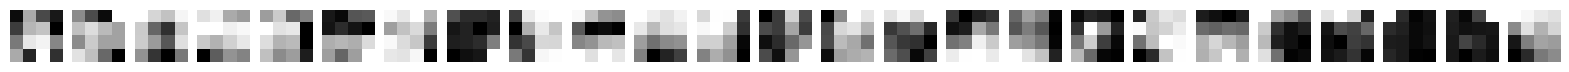

In [ ]:
visualize_patches(best_individual, 4)

It seems that this kind of representation is able to converge faster and to highest fitness values in less iterations. Patches-based representation indeed seems to work more similarly to the graph based representation, but without the drawback of having to allocate a huge amount of memory.

As always, there are both advantages and disadvantages in this representation.
For what concerns the advantages, we observe the following:<br>
*   *Spatial Coherence*: By evolving patches, the method maintains local spatial coherence, which can lead to more meaningful image evolution.
*   *Local Adaptation*: Patches can adapt locally, allowing for finer control over specific regions of the image.

The disadvantages instead are:<br>
*   *Increased Complexity*: Handling and evolving multiple patches adds complexity compared to a single flattened representation.
*   *Potential for Disjointedness*: If not managed well, the patches might not blend seamlessly, resulting in artifacts at the boundaries.

More in general, for what regards the comparison with the flattened representation, the patch based one mantains more local spatial relationships, allowing for more localized and meaningful mutations and crossovers. Even if the flattened representation is simpler and more intuitive, it may lose some local spatial relationships, bringing to poorer results.

# **New frontiers: denoising images**

## **1. The Hopfield Model**

The Hopfield model, introduced by John Hopfield in 1982, is a form of recurrent artificial neural network that serves as an associative memory system. It can store multiple patterns and recover a stored pattern when presented with a noisy or partial version of it. The network's dynamics are driven by an energy function, and the system evolves towards states of lower energy, ideally converging to one of the stored patterns. Hopfield networks have found applications in various areas such as image recognition, optimization problems, and computational neuroscience .

Inspired by the pattern recovery capabilities of Hopfield networks, I sought to explore whether evolutionary algorithms could achieve similar results. Indeed, the main goal here was to see if an evolutionary approach could recover the original patterns (images) from noisy versions, akin to how a Hopfield network would.

Of course there are substantial difference between the two approaches. <br>
First of all, While Hopfield networks are deterministic and update neuron states to minimize energy, evolutionary algorithms rely on stochastic processes like selection, crossover, and mutation to explore the solution space.<br>
For this reason, Hopfield networks are typically faster in pattern recognition due to their deterministic update rules, while evolutionary algorithms may require many generations to converge.<br>
Hopfield networks, however, despite excelling in pattern retrieval tasks, may struggle with complex optimization problems. Evolutionary algorithms are more versatile and can handle a wide range of optimization problems.<br>
Still, both of them are widely used in diverse fields including optimization, machine learning, and artificial intelligence. It could thus be interesting to see if they can reach similar performances or not.




In this study, we will explore two different initialization strategies for the population in our evolutionary algorithm.

1. **Random Noise Initialization**: Starting with populations generated by adding random noise to the target images, the algorithm effectively converged to the original patterns. This approach demonstrated the algorithm's robustness in dealing with noisy data and its capacity to explore a broad search space.

2. **Pixel Changing Initialization**: Initializing populations by changing a fixed number of pixels in the target image showed that the algorithm could still converge to the desired image, even when up to 80% of the pixels were altered. This remarkable capacity for recovery contrasts with the Hopfield model, which typically fails to converge with such extensive perturbations.


This approach will help us understand how different initialization methods influence the convergence behavior of the evolutionary algorithm and its ability to approximate given target images.

## **2. Recovery from perturbation**

In this specific approach, the algorithm starts with two target images and generates an initial population by **adding random noise to one of these images**.<br>
The most crucial aspect of this method is the fitness function. At each iteration, the current individual is compared to each image in our initial set, similar to previous methods, and the highest similarity value is assigned as the new fitness of the individual. This process ensures that if the majority of the population consists of perturbed versions of one of the images in the set, the population will tend to converge towards that specific image.



In [ ]:
import random
import numpy as np
from PIL import Image

class Individual:
    def __init__(self, genome):
        self.genome = genome
        self.fitness = None

def initialize_population(pop_size, genome_length, value_range):
    return [Individual([random.randint(0, value_range - 1) for _ in range(genome_length)]) for _ in range(pop_size)]

def initialize_population_with_noise(pop_size, genome_length, value_range, original_image, noise_level):
    noisy_images = [original_image + np.random.normal(scale=noise_level, size=2500) for _ in range(pop_size)]
    return [Individual(list(noisy_image.flatten())) for noisy_image in noisy_images]


def initialize_population_with_pixel_changes(pop_size, genome_length, value_range, original_image, num_pixel_changes):
    def apply_pixel_changes(image, num_changes):
        changed_image = image.copy()
        change_indices = random.sample(range(genome_length), num_changes)
        for index in change_indices:
            changed_image[index] = random.randint(0, value_range - 1)
        return changed_image

    noisy_images = [apply_pixel_changes(original_image, num_pixel_changes) for _ in range(pop_size)]
    return [Individual(list(noisy_image.flatten())) for noisy_image in noisy_images]


def tournament_selection(population, tournament_size, target_image):
    tournament = random.sample(population, tournament_size)
    tournament_with_fitness = [(ind, calculate_fitness(ind, target_image)) for ind in tournament]
    best_individual = max(tournament_with_fitness, key=lambda x: x[1])
    return best_individual[0]

def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1.genome) - 1)
    #print(type(parent1.genome), type(parent2.genome))
    offspring1 = parent1.genome[:point] + parent2.genome[point:]
    offspring2 = parent2.genome[:point] + parent1.genome[point:]
    return Individual(offspring1), Individual(offspring2)

def uniform_crossover(parent1, parent2):
    child1_genome, child2_genome = [], []
    for i in range(len(parent1.genome)):
        if random.random() < 0.5:
            child1_genome.append(parent1.genome[i])
            child2_genome.append(parent2.genome[i])
        else:
            child1_genome.append(parent2.genome[i])
            child2_genome.append(parent1.genome[i])
    return Individual(np.array(child1_genome)), Individual(np.array(child2_genome))


def mutate(individual, mutation_rate, value_range):
    if random.random() < mutation_rate:
        mutation_point = random.randint(0, len(individual.genome) - 1)
        individual.genome[mutation_point] = random.randint(0, value_range - 1)

def calculate_fitness(candidate, targets):
    #candidate_image = np.reshape(candidate, targets[0].shape)
    max_fitness = 0
    for target in targets:
        error = np.sum(np.abs(np.array(candidate.genome) - np.array(target)))/len(target)
        fitness = 1/(1+error)
        max_fitness = max(max_fitness, fitness)
    return max_fitness

def evolutionary_cycle(population, target):
    for ind in population:
        ind.fitness = calculate_fitness(ind, target)

    initial_avg_similarity = sum(ind.fitness for ind in population) / len(population)
    #print(f"Initial average similarity: {initial_avg_similarity}")

    selected = [tournament_selection(population, 12, target) for _ in population]

    offspring = []
    for i in range(0, len(population), 2):
        off1, off2 = uniform_crossover(selected[i], selected[i + 1])
        offspring.extend([off1, off2])

    for ind in offspring:
        mutate(ind, 0.5, 256)

    for ind in offspring:
        ind.fitness = calculate_fitness(ind, target)

    population.sort(key=lambda x: x.fitness, reverse=True)
    new_population = population[:2]
    new_population.extend(sorted(offspring, key=lambda x: x.fitness, reverse=True)[:len(population)-2])
    return new_population





def run_evolution(pop_size, genome_length, value_range, target, max_generations, fitness_threshold, image_to_reach, noise=200, random_ratio=0.5, output_folder='output'):

    #population = initialize_mixed_population(pop_size, genome_length, value_range, image_to_reach, noise, random_ratio)
    population = initialize_population_with_pixel_changes(pop_size, genome_length, value_range, image_to_reach, noise)
    #population = initialize_population_with_noise(pop_size, genome_length, value_range, image_to_reach, noise)
    csv_file_path = os.path.join(output_folder, f"evolution_changing_pixels_{noise}_venere.csv")

    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Generation', 'Best Fitness', 'Average Similarity'])

        for generation in range(max_generations):
            population = evolutionary_cycle(population, target)
            best_fitness = max(ind.fitness for ind in population)
            avg_similarity = sum(ind.fitness for ind in population) / len(population)
            writer.writerow([generation, best_fitness, avg_similarity])
            #if generation%100 == 0:
            #  print(f"Generation {generation}: Best Fitness {best_fitness}")
            if best_fitness >= fitness_threshold:
                break
    return population

output_folder = '/content/drive/MyDrive/evolutionary_algorithms'


## **2.1 Recovering** ***Venere***

Here I will start by creating a population from noised version of the *"Venere"* of Botticelli. Note that I will use the same exact algorithm also for the successive example. The only difference will be in the initialization of the population. If we initialize individuals to be similar to one of the images in the set, the algorithm will converge there.

In [ ]:
# Example usage
target_image_1 = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to RGB
target_image_2 = Image.open('/content/drive/MyDrive/venere_di_botticelli.jpg').convert('L')
target_image_1 = target_image_1.resize((50, 50))
target_image_2 = target_image_2.resize((50, 50))

target_image_1 = np.array(target_image_1)
target_image_1_flattened = target_image_1.flatten()  # Simulated target image

target_image_2 = np.array(target_image_2)
target_image_2_flattened = target_image_2.flatten()

target_image_flattened = [target_image_2_flattened, target_image_1_flattened]
final_population_combined = run_evolution(200, 2500, 256, target_image_flattened, 5000, 0.7, target_image_2_flattened, 200, output_folder = output_folder)  # 7500 = 50*50*3 for RGB

Text(0.5, 1.0, 'Starting Image')

(-0.5, 49.5, 49.5, -0.5)

Text(0.5, 1.0, 'Evolved Image')

(-0.5, 49.5, 49.5, -0.5)

Text(0.5, 1.0, 'Target Image')

(-0.5, 49.5, 49.5, -0.5)

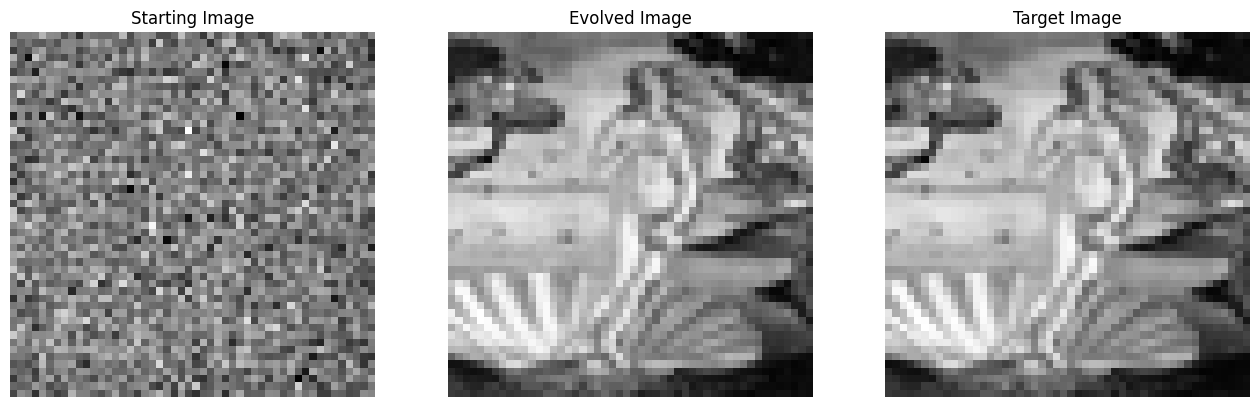

In [ ]:
target_image_2 = Image.open('/content/drive/MyDrive/venere_di_botticelli.jpg').convert('L')
target_image_2 = target_image_2.resize((50, 50))

population = initialize_population_with_noise(1, 2500, 256, target_image_2_flattened, 200)
random_initial_image = population[0].genome

best_image = max(final_population_combined, key=lambda x: x.fitness)

fig, ax = plt.subplots(1,3, figsize = (16,8))

ax[0].imshow(np.array(random_initial_image).reshape((50,50)), cmap = 'gray')
ax[0].set_title('Starting Image')
ax[0].axis('off')
ax[1].imshow(np.array(best_image.genome).reshape((50,50)), cmap = 'gray')
ax[1].set_title('Evolved Image')
ax[1].axis('off')
ax[2].imshow(target_image_2, cmap = 'gray')
ax[2].set_title('Target Image')
ax[2].axis('off')



## **2.2 Recovering** ***Viandante***

We can now do the same thing, but with the other picture. We will use the same algorithm as before, but now the population will be drawn from another image.

In [ ]:
target_image_1 = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to RGB
target_image_2 = Image.open('/content/drive/MyDrive/venere_di_botticelli.jpg').convert('L')
target_image_1 = target_image_1.resize((50, 50))
target_image_2 = target_image_2.resize((50, 50))

target_image_1 = np.array(target_image_1)
target_image_1_flattened = target_image_1.flatten()  # Simulated target image

target_image_2 = np.array(target_image_2)
target_image_2_flattened = target_image_2.flatten()

target_image_flattened = [target_image_2_flattened, target_image_1_flattened]
final_population_combined_1 = run_evolution(200, 2500, 256, target_image_flattened, 2000, 0.7, target_image_1_flattened, 200, output_folder = output_folder)  # 7500 = 50*50*3 for RGB

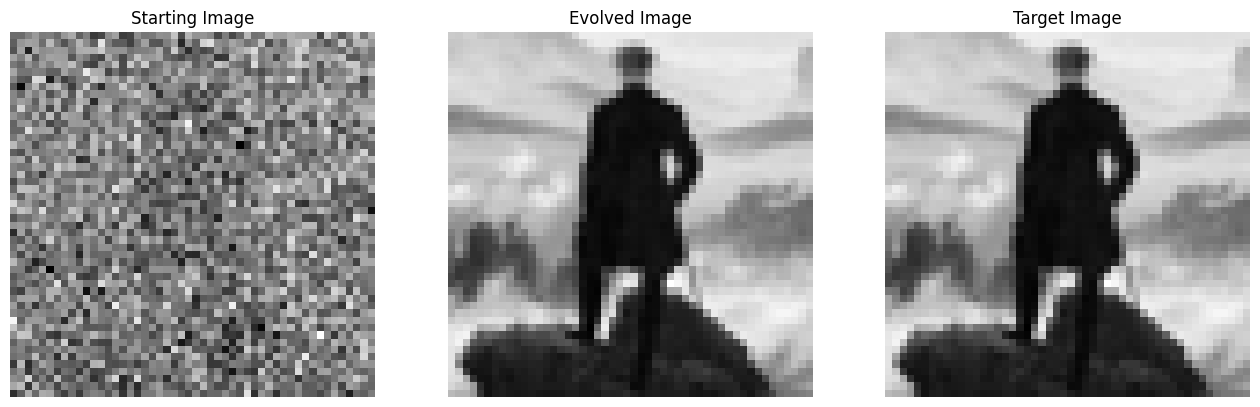

In [ ]:
target_image_1 = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')
target_image_1 = target_image_1.resize((50, 50))


population = initialize_population_with_noise(1, 2500, 256, target_image_1_flattened, 250)
random_initial_image = population[0].genome

best_image = max(final_population_combined_1, key=lambda x: x.fitness)
fig, ax = plt.subplots(1,3, figsize = (16,8))

ax[0].imshow(np.array(random_initial_image).reshape((50,50)), cmap = 'gray')
ax[0].set_title('Starting Image')
ax[0].axis('off')
ax[1].imshow(np.array(best_image.genome).reshape((50,50)), cmap = 'gray')
ax[1].set_title('Evolved Image')
ax[1].axis('off')
ax[2].imshow(target_image_1, cmap = 'gray')
ax[2].set_title('Target Image')
ax[2].axis('off')
plt.show();


We see that also in this case, the algorithm succesfully converged to the desired output.

## **3. Recovery from pixels' changes**

We can now explore how changing a specific number of pixels in the image affects the population's behavior. In the Hopfield model, generally, changing up to 50% of the pixels does not prevent the system from converging to the desired image. We aim to determine if a similar phenomenon occurs in our evolutionary algorithm. By randomly altering a fixed number of pixels in the target image, we initialize the population with varied perturbations and observe how well the algorithm can recover the original pattern. This method allows us to test the robustness of the evolutionary algorithm in pattern recovery, much like the Hopfield model, but with the added flexibility of genetic diversity.

To make the reader clear what we are doing here, one of the possible initial images in our population could look like this, if we change 2000 pixels out of 2500

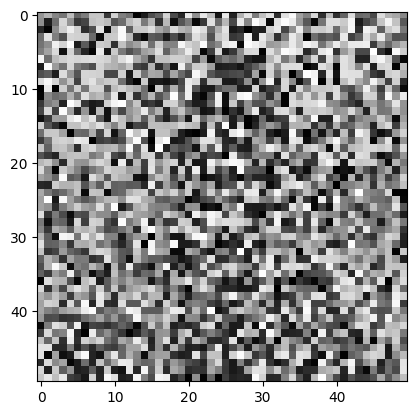

In [ ]:
population = initialize_population_with_pixel_changes(1, 2500, 256, target_image_1_flattened, 2000)
random_initial_image = population[0].genome

plt.imshow(np.array(random_initial_image).reshape((50,50)), cmap = 'gray')

We can now run the algorithm

In [ ]:
pixels = [500,1000, 1500, 2000]
starting_images = []
evolved_images = []
# Example usage
target_image_1 = Image.open('/content/drive/MyDrive/viandante-sul-mare-di-nebbia.png').convert('L')  # Open image and convert to RGB
target_image_2 = Image.open('/content/drive/MyDrive/venere_di_botticelli.jpg').convert('L')
target_image_1 = target_image_1.resize((50, 50))
target_image_2 = target_image_2.resize((50, 50))

target_image_1 = np.array(target_image_1)
target_image_1_flattened = target_image_1.flatten()  # Simulated target image

target_image_2 = np.array(target_image_2)
target_image_2_flattened = target_image_2.flatten()

target_image_flattened = [target_image_2_flattened, target_image_1_flattened]


for pixel in pixels:
  final_population_combined = run_evolution(200, 2500, 256, target_image_flattened, 2000, 0.7, target_image_2_flattened, pixel, output_folder = output_folder)
  best_image = max(final_population_combined_1, key=lambda x: x.fitness)
  evolved_images.extend(best_image.genome)




We can also plot how the fitness curves changed among different number of pixels' changes.

Text(0.5, 1.0, 'Fitness Curves for different pixel changings')

Text(0.5, 0, 'Generation')

Text(0, 0.5, 'Best Fitness')

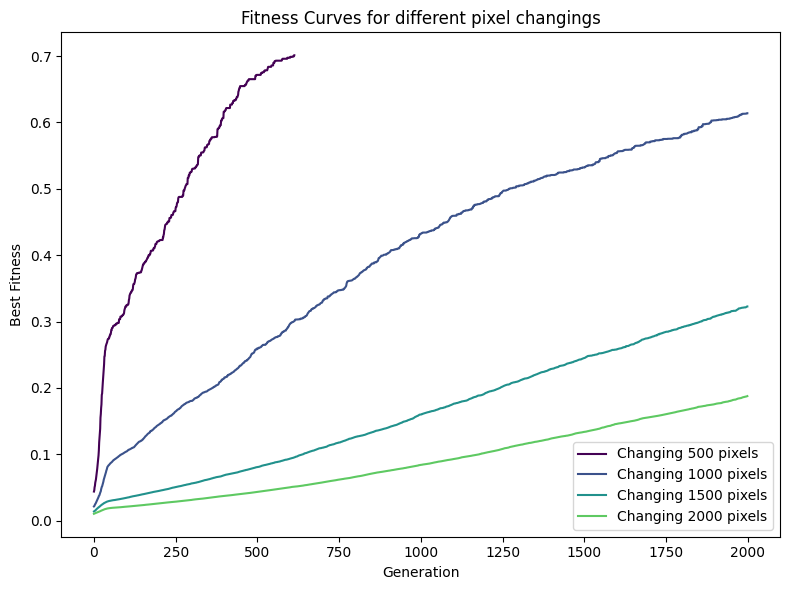

In [ ]:
import pandas as pd
output_folder = '/content/drive/MyDrive/evolutionary_algorithms'
pixels = [500,1000, 1500, 2000]

# Function to load CSV data
def load_csv_data_wheel(output_folder, crossovers):
    data = {}
    for pixel in pixels:
        file_path = os.path.join(output_folder, f"evolution_changing_pixels_{pixel}_venere.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data[(pixel)] = df
    return data

# Load data
data = load_csv_data_wheel(output_folder, pixels)


fig, ax = plt.subplots(figsize=(8, 6))

for j, pixel in enumerate(pixels):
    if (pixel) in data:
        df = data[(pixel)]
        ax.plot(df['Generation'], df['Best Fitness'], label=f'Changing {pixel} pixels', color=plt.cm.viridis(j/ len(pixels)))

ax.set_title(f'Fitness Curves for different pixel changings')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness')
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show()


The results indicate that when fewer pixels are altered, the population converges faster to the target image. However, even when as many as 2000 out of 2500 pixels are changed, the population still converges, albeit more slowly. This resilience contrasts with the Hopfield model, where such a high level of pixel changes would typically prevent convergence to the desired pattern. This suggests that the evolutionary algorithm possesses a greater capacity for recovery and adaptation, leveraging genetic diversity and selection pressure to overcome substantial perturbations in the initial population.

In conclusion, the evolutionary algorithm demonstrated remarkable adaptability and robustness across various initialization strategies. Whether starting with random noise, or specific pixel changes, the algorithm consistently converged towards the target images, albeit at different rates. These findings highlight the algorithm's flexibility in pattern recovery, surpassing the Hopfield model's limitations in handling extensive perturbations. This study underscores the potential of evolutionary algorithms in solving complex optimization problems through genetic diversity and iterative improvement, paving the way for broader applications in image processing and beyond.

# **Conclusions**


In this comprehensive study, we explored various facets of evolutionary algorithms for image approximation and pattern recovery, extending our investigation to different initialization strategies and drawing comparisons with the Hopfield model. Our primary goal was to understand the impact of different parameters and initialization methods on the algorithm's performance and its ability to recover target images.

We began with an extensive analysis of the key parameters that influence the performance of evolutionary algorithms. This included:

1. **Selection Methods**: We compared tournament selection and roulette wheel selection. Our findings indicated that tournament selection consistently yielded better results in terms of convergence speed and fitness improvements, particularly when used with larger tournament sizes.

2. **Crossover Techniques**: We evaluated single-point, multi-point, and uniform crossover methods. The results showed that multi-point crossover with a moderate number of points (25 to 50) and uniform crossover led to faster convergence and higher fitness compared to single-point crossover.

3. **Mutation Rates**: Higher mutation rates (up to 0.5) were found to be effective in maintaining genetic diversity and preventing premature convergence. This was particularly important for escaping local minima and ensuring robust exploration of the solution space.

4. **Population Size**: We observed that increasing the population size improved fitness and convergence speed. For instance, a population of 1000 individuals nearly achieved perfect fitness, whereas smaller populations (e.g., 20 individuals) reached a fitness no higher than 0.2. This underscores the importance of maintaining a sufficiently large population to enhance the algorithm's search capabilities.

5. **Image Resolution**: Conducting our analyses on both low-resolution (20x20) and higher-resolution (50x50) images, we found that higher resolution images significantly slowed down the computations. Despite this, the trends observed in parameter effects were consistent across resolutions, reinforcing the scalability of our findings.


To enhance understanding, we included a visualization component, keeping 100 individuals and using single-point crossover to speed up computations. Although this was not the optimal method, it provided clear insights without the extended computational time required for higher-resolution images.

While our primary focus was on evolutionary algorithms, we also compared their performance with the Hopfield model. Although the Hopfield model can quickly converge to stored patterns, it struggles with significant perturbations, where the evolutionary algorithm excels due to its robust exploration capabilities and genetic diversity.



#### **Limitations and Future Work**

Our study had several limitations. The computational cost of running multiple generations with large populations was significant, and our analysis was limited to grayscale images resized to 50x50 pixels. Future studies could address these limitations by:

1. **Scaling Up**: Testing the algorithm's performance on larger, more complex, and colored images to understand its scalability and applicability in real-world scenarios.
2. **Efficiency Improvements**: Developing optimization techniques, such as parallel processing or hybrid approaches, to reduce computational costs.
3. **Robustness Testing**: Exploring the algorithm's robustness under various noise types and levels, and its performance in recovering images from partial or corrupted data.
4. **Broader Comparisons**: Conducting comparative studies with other pattern recovery models, like neural networks and deep learning techniques, to position evolutionary algorithms within the broader context of image processing.


In conclusion, our study demonstrated the effectiveness and versatility of evolutionary algorithms in image approximation and pattern recovery. Through careful parameter tuning and innovative initialization strategies, we achieved significant improvements in convergence and fitness. The algorithm's robustness, flexibility, and ability to recover from extensive perturbations underscore its potential for diverse applications in artificial intelligence and beyond. These findings pave the way for further research and optimization, aiming to harness the full power of evolutionary algorithms in complex, real-world problems.


### *Citations*

> Modern Evolution Strategies for Creativity:
Fitting Concrete Images and Abstract Concepts.
*Yingtao Tian,
David Ha*,
Google Brain


> Evolutionary Art
Producing artwork using evolutionary algorithms.
*Moshe Sipper, Ph.D*

>Performance Analysis of Hopfield Model of Neural Network With Evolutionary Approach for Pattern Recalling.
*Thipendra P Singh,
Manu Pratap Singh,
Somesh Kumar*

